# Comparing the data produced by Marilyn Ferland to the obsflow output

## Load and display Marilyn's extracted data

'ERA5-LAND Marilyn'

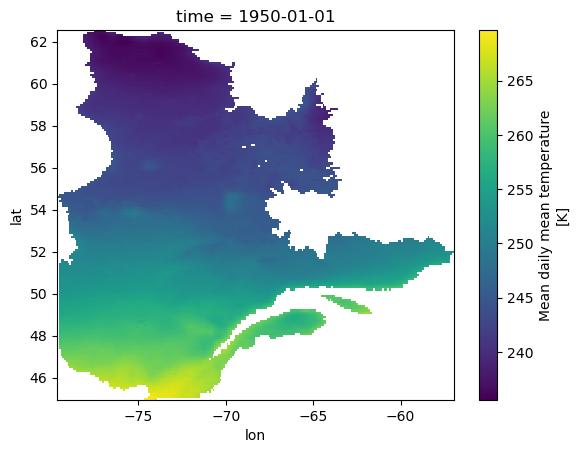

'RDRS Marilyn'

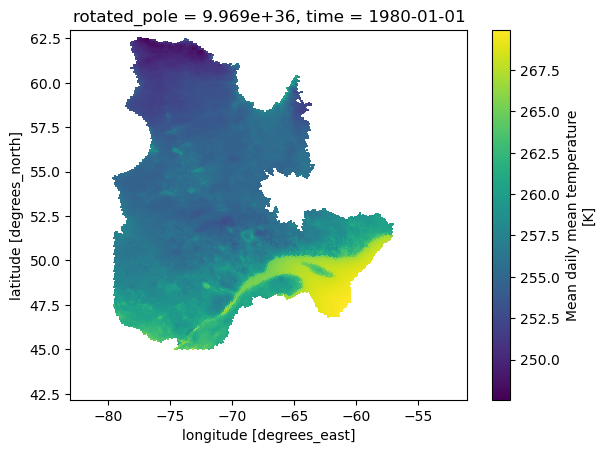

In [2]:
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt

mf_dir = Path('/scen3/braun/data/obs_synthese23/data_marilyn/data/')
data_mf = ['AHCCD/months/mean/AHCCD_gen3_day_temperature_monthly_temp_mean.zarr', 'ERA5-LAND/months/mean/ECMWF_ERA5-Land_monthly_temp_mean.zarr', 'RDRS/months/mean/GouvCan_RDRS_monthly_temp_mean.zarr']

for d in data_mf:
    ds = xr.open_dataset(mf_dir / d, engine='zarr')
    #display(f'{d.split("/")[0]} Marilyn', ds)
    if 'AHCCD' in d: continue
    plt.figure()
    display(f'{d.split("/")[0]} Marilyn', ds.tg_mean.isel(time=0).plot(x='lon', y='lat'))
    plt.show()

## Load and display obsflow extracted data


--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


'ECMWF_ERA5-Land_NAM obsflow'

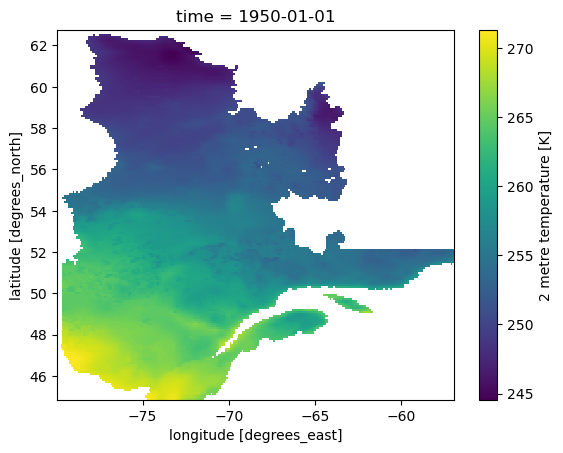

'GovCan_AHCCD_CAN.Quebec.extracted.D'

<xarray.Dataset>
Dimensions:       (station: 146, time: 66415)
Coordinates: (12/16)
    elev          (station) int32 dask.array<chunksize=(146,), meta=np.ndarray>
    frommonth     (station) int32 dask.array<chunksize=(146,), meta=np.ndarray>
    fromyear      (station) int32 dask.array<chunksize=(146,), meta=np.ndarray>
    joined        (station) object dask.array<chunksize=(146,), meta=np.ndarray>
    lat           (station) float64 dask.array<chunksize=(146,), meta=np.ndarray>
    lon           (station) float64 dask.array<chunksize=(146,), meta=np.ndarray>
    ...            ...
  * station       (station) object '7010720' '7011983' ... '7116505' '7117823'
    station_name  (station) object dask.array<chunksize=(146,), meta=np.ndarray>
    stnid         (station) object dask.array<chunksize=(146,), meta=np.ndarray>
  * time          (time) datetime64[ns] 1840-03-01 1840-03-02 ... 2021-12-31
    tomonth       (station) int32 dask.array<chunksize=(146,), meta=np.ndarray>
    toyear        (station) int32 dask.array<chunksize=(146,), meta=np.ndarray>
Data variables:
    crs           int64 ...
    tas           (station, time) float64 dask.array<chunksize=(50, 66415), meta=np.ndarray>
    tasmax        (station, time) float64 dask.array<chunksize=(50, 66415), meta=np.ndarray>
    tasmin        (station, time) float64 dask.array<chunksize=(50, 66415), meta=np.ndarray>
Attributes: (12/27)
    cat:_data_format_:       zarr
    cat:date_end:            2021-12-31 00:00:00
    cat:date_start:          1840-03-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           day
    cat:id:                  GovCan_AHCCD_CAN
    ...                      ...
    licence:                 https:/open.canada.ca/en/open-government-licence...
    licence_type:            permissive
    title:                   Third Generation of Homogenized Daily Temperatur...
    type:                    station_obs
    intake_esm_vars:         ('tasmin', 'tas', 'tasmax')
    cat:path:                /scen3/braun/data/obs_synthese23/extracted/GovCa...

'GovCan_RDRS_NAM obsflow'

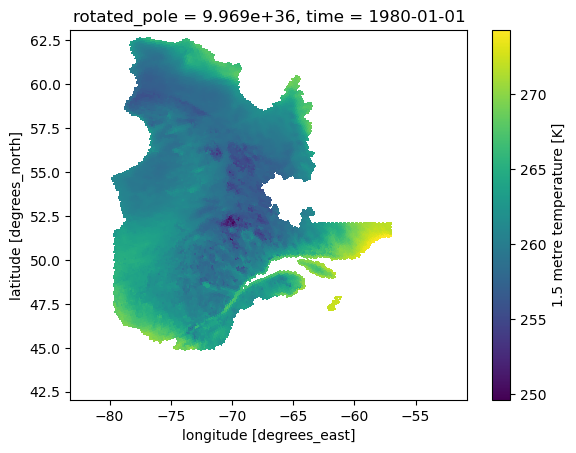

In [3]:
# load data extracted from obsflow
import xscen as xs

pcat = xs.ProjectCatalog('/scen3/braun/data/obs_synthese23/pcat_obs.json')
#display(pcat.df)
ds_dict = pcat.search(processing_level='extracted').to_dataset_dict()

for ds_id, ds_in in sorted(ds_dict.items()):
    if 'MRCC' in ds_id: continue
    if 'AHCCD' in ds_id:
       display(ds_id, ds_in)
    else:
        plt.figure()
        display(f'{ds_id.split(".")[0]} obsflow', ds_in.tas.isel(time=0).plot(x='lon', y='lat'))
        plt.show()


## Compare the data produced with obsflow to the data generated by Marilyn Ferland (monthly, seasonal averages)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


'ECMWF_ERA5-Land_NAM monthly Marilyn'

<xarray.Dataset>
Dimensions:  (lat: 41, lon: 41, time: 872)
Coordinates:
  * lat      (lat) float32 47.0 47.1 47.2 47.3 47.4 ... 50.6 50.7 50.8 50.9 51.0
  * lon      (lon) float32 -75.0 -74.9 -74.8 -74.7 ... -71.3 -71.2 -71.1 -71.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-08-01
Data variables:
    tg_mean  (time, lat, lon) float32 ...
    tn_mean  (time, lat, lon) float32 ...
    tx_mean  (time, lat, lon) float32 ...
Attributes:
    cell_methods:   time: point time: mean over days
    description:    Monthly mean of daily minimum temperature.
    history:        [2023-07-03 13:19:23] tn_mean: TN_MEAN(tasmin=tasmin, fre...
    long_name:      Mean daily minimum temperature
    standard_name:  air_temperature
    units:          K

'ECMWF_ERA5-Land_NAM monthly obsflow'

<xarray.Dataset>
Dimensions:  (time: 872, lat: 41, lon: 41)
Coordinates:
  * lat      (lat) float32 47.0 47.1 47.2 47.3 47.4 ... 50.6 50.7 50.8 50.9 51.0
  * lon      (lon) float32 -75.0 -74.9 -74.8 -74.7 ... -71.3 -71.2 -71.1 -71.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-08-01
Data variables:
    pr       (time, lat, lon) float32 4.102e-05 4.089e-05 ... 3.791e-05
    tas      (time, lat, lon) float32 262.3 262.2 262.2 ... 9.969e+36 9.969e+36
    tasmax   (time, lat, lon) float32 268.8 268.6 268.4 ... 9.969e+36 9.969e+36
    tasmin   (time, lat, lon) float32 256.3 256.5 256.7 ... 9.969e+36 9.969e+36
    crs      (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:domain:              Quebec
    cat:frequency:           day
    cat:id:                  ECMWF_ERA5-Land_NAM
    cat:institution:         ECMWF
    ...                      ...
    table_id:                ECMWF
    type:                    reconstruction
    intake_esm_vars:         ('tasmin', 'pr', 'tas', 'tasmax')
    cat:date_start:          1950-01-01 00:00:00
    cat:date_end:            2022-09-30 00:00:00
    cat:path:                /scen3/braun/data/obs_synthese23/extracted/ECMWF...

Display the datasets and their difference at 3 random times


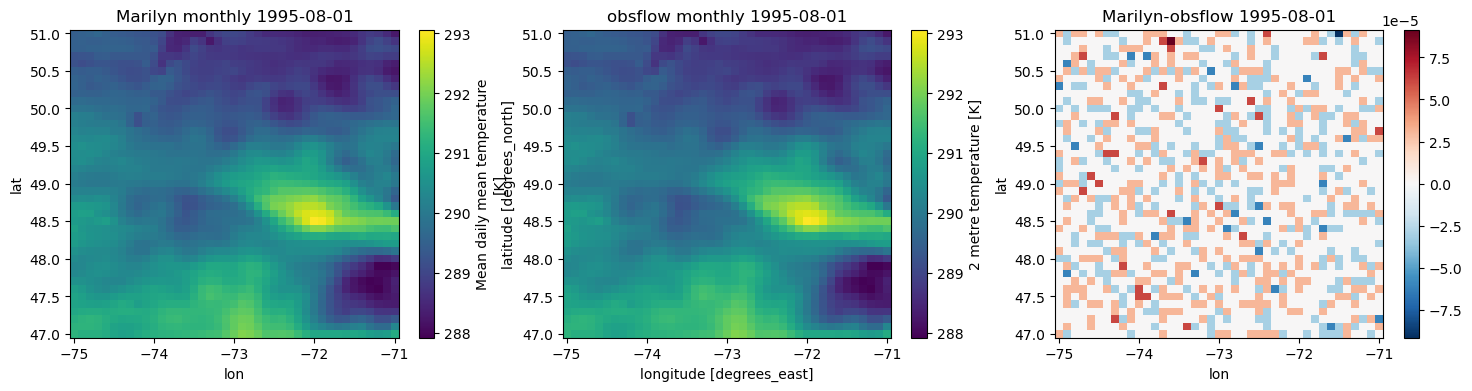

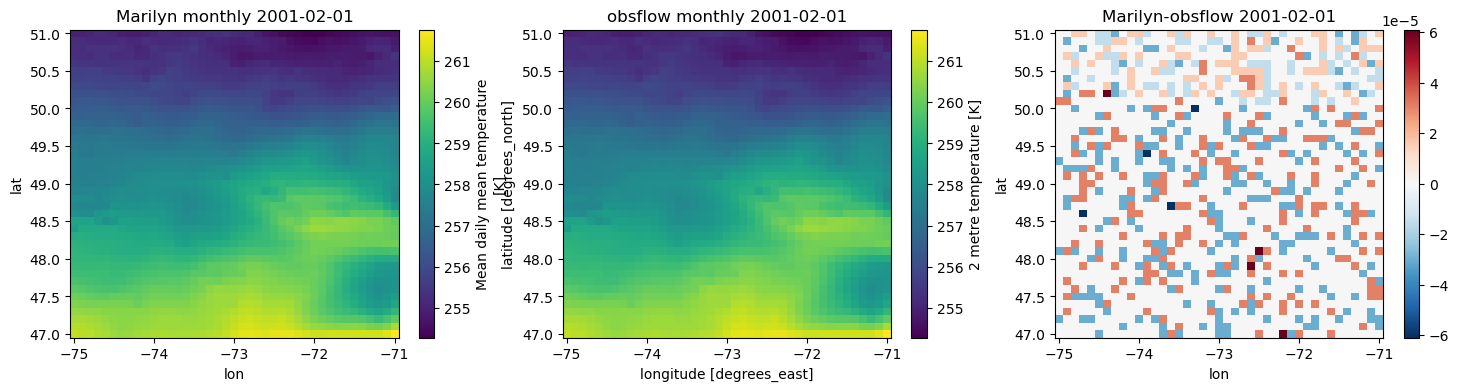

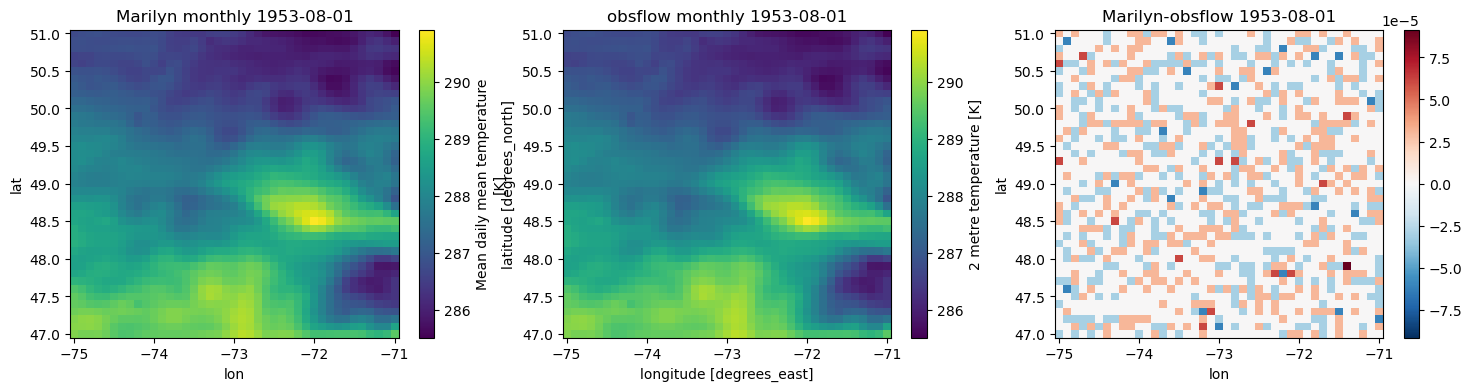

'GovCan_RDRS_NAM monthly Marilyn'

<xarray.Dataset>
Dimensions:       (rlat: 51, rlon: 41, time: 468)
Coordinates:
    lat           (rlat, rlon) float32 47.31 47.28 47.26 ... 50.65 50.62 50.59
    lon           (rlat, rlon) float32 -76.37 -76.24 -76.11 ... -69.32 -69.19
  * rlat          (rlat) float32 -9.63 -9.54 -9.45 -9.36 ... -5.31 -5.22 -5.13
  * rlon          (rlon) float32 371.0 371.0 371.1 371.2 ... 374.4 374.5 374.6
    rotated_pole  float32 9.969e+36
  * time          (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2018-12-01
Data variables:
    tg_mean       (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tn_mean       (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tx_mean       (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    cell_methods:   time: minimum (interval: 1 day) time: mean over days
    description:    Monthly mean of daily minimum temperature.
    history:        [2023-07-03 12:29:20] tn_mean: TN_MEAN(tasmin=tasmin, fre...
    long_name:      Mean daily minimum temperature
    standard_name:  air_temperature
    units:          K

'GovCan_RDRS_NAM monthly obsflow'

<xarray.Dataset>
Dimensions:       (time: 468, rlat: 51, rlon: 41)
Coordinates:
    lat           (rlat, rlon) float32 47.31 47.28 47.26 ... 50.65 50.62 50.59
    lon           (rlat, rlon) float32 -76.37 -76.24 -76.11 ... -69.32 -69.19
  * rlat          (rlat) float32 -9.63 -9.54 -9.45 -9.36 ... -5.31 -5.22 -5.13
  * rlon          (rlon) float32 371.0 371.0 371.1 371.2 ... 374.4 374.5 374.6
    rotated_pole  float32 9.969e+36
  * time          (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2018-12-01
Data variables:
    pr            (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tas           (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tasmax        (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tasmin        (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    crs           (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    cat:_data_format_:       zarr
    cat:date_end:            2018-12-31 00:00:00
    cat:date_start:          1980-01-01 00:00:00
    cat:domain:              Quebec
    ...                      ...
    table_date:              12 December 2022
    table_id:                EC
    type:                    reconstruction
    version:                 v2.1
    intake_esm_vars:         ('tasmin', 'pr', 'tas', 'tasmax')
    cat:path:                /scen3/braun/data/obs_synthese23/extracted/GovCa...

Display the datasets and their difference at 3 random times


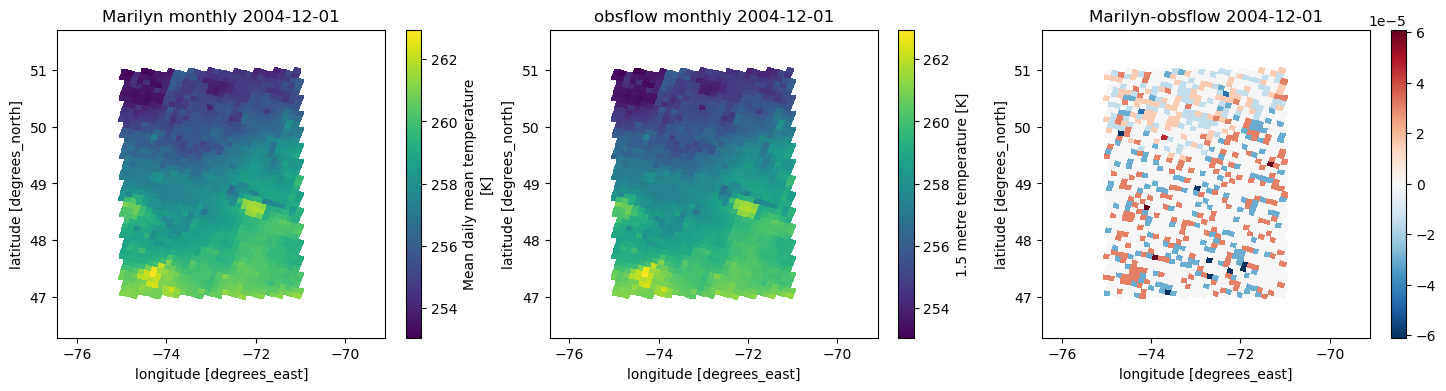

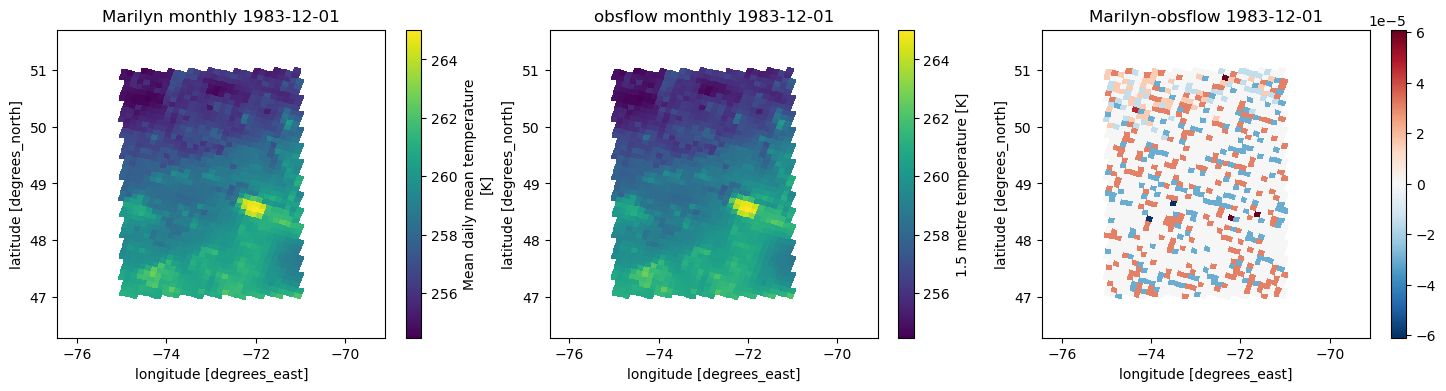

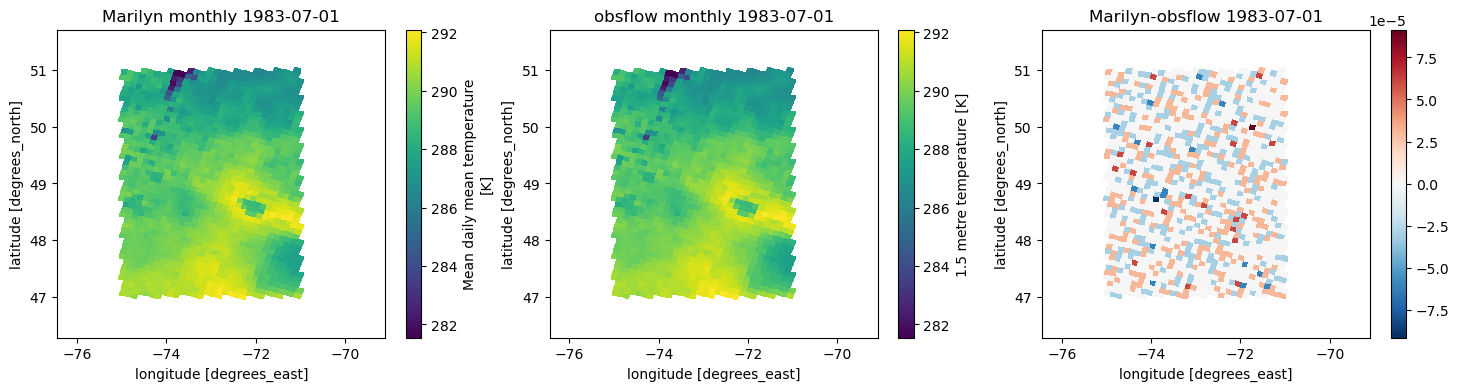

'ECMWF_ERA5-Land_NAM seasonal Marilyn'

<xarray.Dataset>
Dimensions:  (lat: 41, lon: 41, time: 291)
Coordinates:
  * lat      (lat) float32 47.0 47.1 47.2 47.3 47.4 ... 50.6 50.7 50.8 50.9 51.0
  * lon      (lon) float32 -75.0 -74.9 -74.8 -74.7 ... -71.3 -71.2 -71.1 -71.0
  * time     (time) datetime64[ns] 1949-12-01 1950-03-01 ... 2022-06-01
Data variables:
    tg_mean  (time, lat, lon) float32 ...
    tn_mean  (time, lat, lon) float32 ...
    tx_mean  (time, lat, lon) float32 ...
Attributes:
    cell_methods:   time: point time: mean over days
    description:    Seasonal mean of daily minimum temperature.
    history:        [2023-07-03 13:00:10] tn_mean: TN_MEAN(tasmin=tasmin, fre...
    long_name:      Mean daily minimum temperature
    standard_name:  air_temperature
    units:          K

'ECMWF_ERA5-Land_NAM seasonal obsflow'

<xarray.Dataset>
Dimensions:  (time: 291, lat: 41, lon: 41)
Coordinates:
  * lat      (lat) float32 47.0 47.1 47.2 47.3 47.4 ... 50.6 50.7 50.8 50.9 51.0
  * lon      (lon) float32 -75.0 -74.9 -74.8 -74.7 ... -71.3 -71.2 -71.1 -71.0
  * time     (time) datetime64[ns] 1949-12-01 1950-03-01 ... 2022-06-01
Data variables:
    pr       (time, lat, lon) float32 3.305e-05 3.308e-05 ... 5.549e-05
    tas      (time, lat, lon) float32 260.7 260.7 260.7 ... 1.608e+35 1.608e+35
    tasmax   (time, lat, lon) float32 266.9 266.7 266.4 ... 1.608e+35 1.608e+35
    tasmin   (time, lat, lon) float32 255.2 255.4 255.7 ... 1.608e+35 1.608e+35
    crs      (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:domain:              Quebec
    cat:frequency:           day
    cat:id:                  ECMWF_ERA5-Land_NAM
    cat:institution:         ECMWF
    ...                      ...
    table_id:                ECMWF
    type:                    reconstruction
    intake_esm_vars:         ('tasmin', 'pr', 'tas', 'tasmax')
    cat:date_start:          1950-01-01 00:00:00
    cat:date_end:            2022-09-30 00:00:00
    cat:path:                /scen3/braun/data/obs_synthese23/extracted/ECMWF...

Display the datasets and their difference at 3 random times


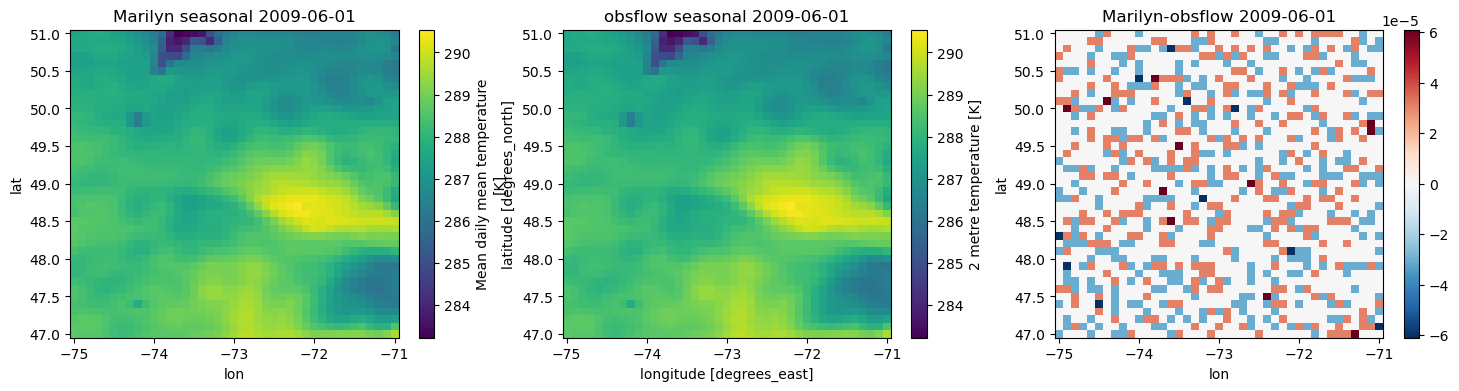

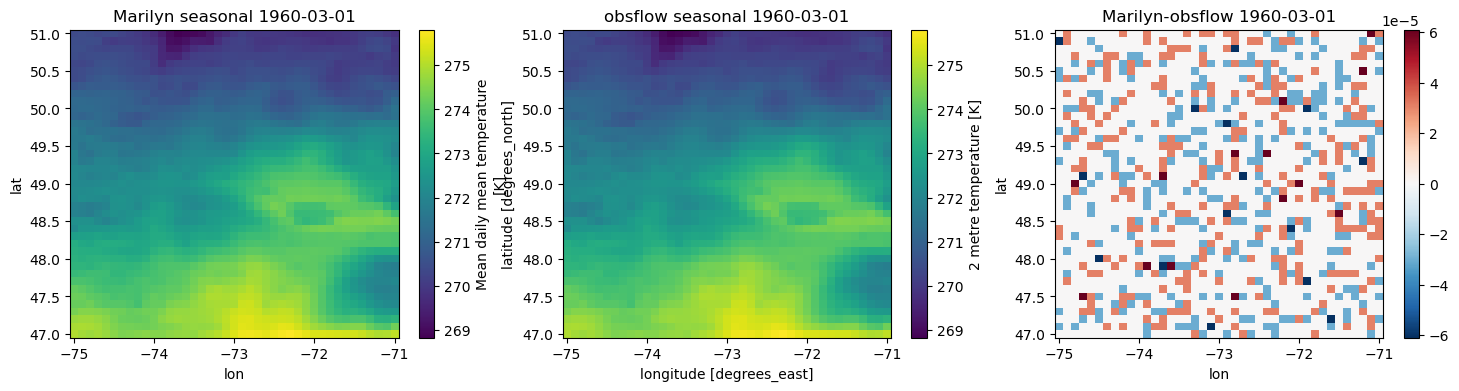

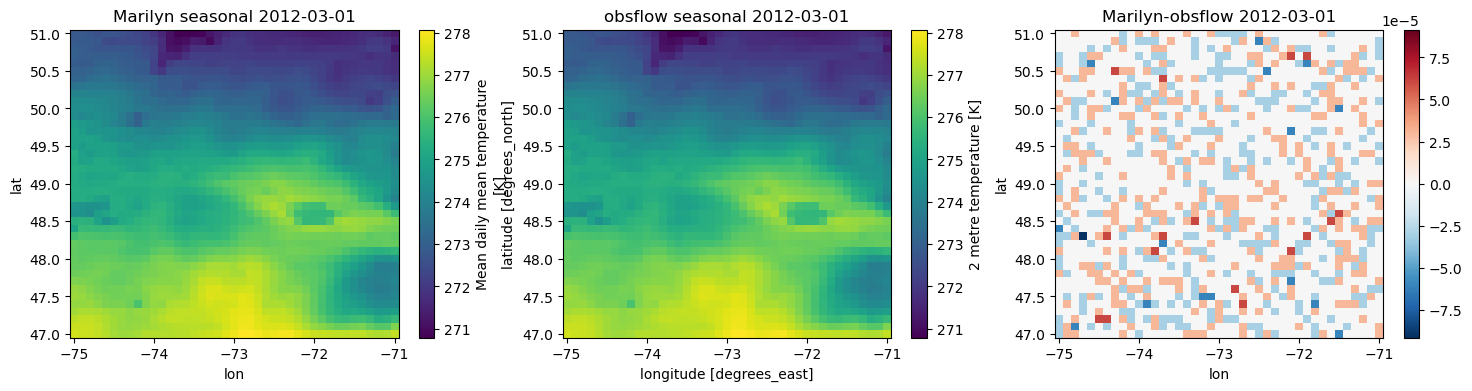

'GovCan_RDRS_NAM seasonal Marilyn'

<xarray.Dataset>
Dimensions:       (rlat: 51, rlon: 41, time: 157)
Coordinates:
    lat           (rlat, rlon) float32 47.31 47.28 47.26 ... 50.65 50.62 50.59
    lon           (rlat, rlon) float32 -76.37 -76.24 -76.11 ... -69.32 -69.19
  * rlat          (rlat) float32 -9.63 -9.54 -9.45 -9.36 ... -5.31 -5.22 -5.13
  * rlon          (rlon) float32 371.0 371.0 371.1 371.2 ... 374.4 374.5 374.6
    rotated_pole  float32 9.969e+36
  * time          (time) datetime64[ns] 1979-12-01 1980-03-01 ... 2018-12-01
Data variables:
    tg_mean       (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tn_mean       (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tx_mean       (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    cell_methods:   time: minimum (interval: 1 day) time: mean over days
    description:    Seasonal mean of daily minimum temperature.
    history:        [2023-07-03 11:53:09] tn_mean: TN_MEAN(tasmin=tasmin, fre...
    long_name:      Mean daily minimum temperature
    standard_name:  air_temperature
    units:          K

'GovCan_RDRS_NAM seasonal obsflow'

<xarray.Dataset>
Dimensions:       (time: 157, rlat: 51, rlon: 41)
Coordinates:
    lat           (rlat, rlon) float32 47.31 47.28 47.26 ... 50.65 50.62 50.59
    lon           (rlat, rlon) float32 -76.37 -76.24 -76.11 ... -69.32 -69.19
  * rlat          (rlat) float32 -9.63 -9.54 -9.45 -9.36 ... -5.31 -5.22 -5.13
  * rlon          (rlon) float32 371.0 371.0 371.1 371.2 ... 374.4 374.5 374.6
    rotated_pole  float32 9.969e+36
  * time          (time) datetime64[ns] 1979-12-01 1980-03-01 ... 2018-12-01
Data variables:
    pr            (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tas           (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tasmax        (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tasmin        (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    crs           (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    cat:_data_format_:       zarr
    cat:date_end:            2018-12-31 00:00:00
    cat:date_start:          1980-01-01 00:00:00
    cat:domain:              Quebec
    ...                      ...
    table_date:              12 December 2022
    table_id:                EC
    type:                    reconstruction
    version:                 v2.1
    intake_esm_vars:         ('tasmin', 'pr', 'tas', 'tasmax')
    cat:path:                /scen3/braun/data/obs_synthese23/extracted/GovCa...

Display the datasets and their difference at 3 random times


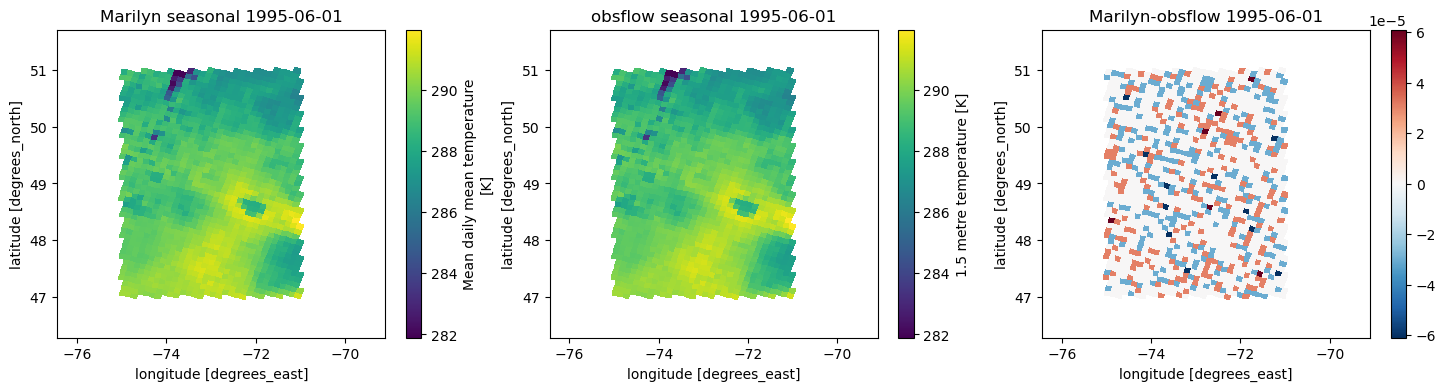

IndexError: index 157 is out of bounds for axis 0 with size 157

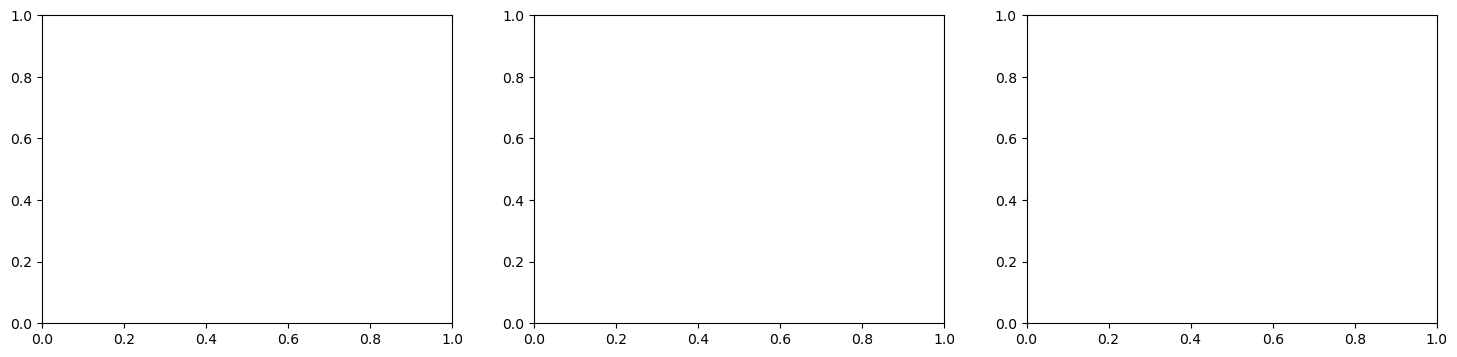

In [4]:
import xarray as xr
from pathlib import Path
from clisops.core.subset import subset_bbox
import matplotlib.pyplot as plt
import xscen as xs
import random

# trying to find the right data
#ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/data_marilyn/data/RDRS/RDRS_qc_data.zarr', engine='zarr')
# ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/data_marilyn/data/ERA5-LAND/era5_land_qc_data.nc')
# ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/data_marilyn/data/ERA5-LAND/months/mean/ERA5_LAND_mean_temperature_yearly_JAN.zarr', engine='zarr')
# ds = xr.open_dataset('/scen3/braun/data/obs_synthese23/data_marilyn/data/RDRS/months/mean/RDRS_mean_temperature_yearly_JUN.zarr', engine='zarr')
# ds

mf_dir = Path('/scen3/braun/data/obs_synthese23/data_marilyn/data/')
data_mf = {'monthly' : ['AHCCD/months/mean/AHCCD_gen3_day_temperature_monthly_temp_mean.zarr', 'ERA5-LAND/months/mean/ECMWF_ERA5-Land_monthly_temp_mean.zarr', 'RDRS/months/mean/GouvCan_RDRS_monthly_temp_mean.zarr'], 
           'seasonal': ['AHCCD/seasons/mean/AHCCD_gen3_day_temperature_seasonal_temp_mean.zarr', 'ERA5-LAND/seasons/mean/ECMWF_ERA5-Land_seasonal_temp_mean.zarr', 'RDRS/seasons/mean/GouvCan_RDRS_seasonal_temp_mean.zarr']}
data_of = ['GovCan_AHCCD_CAN.Quebec.extracted.D',  'ECMWF_ERA5-Land_NAM.Quebec.extracted.D', 'GovCan_RDRS_NAM.Quebec.extracted.D']
tmp_agg = {'monthly': 'MS', 'seasonal': 'QS-DEC'}
#tmp_res = 'seasonal'

pcat = xs.ProjectCatalog('/scen3/braun/data/obs_synthese23/pcat_obs.json')
#display(pcat.df)
ds_dict = pcat.search(processing_level='extracted').to_dataset_dict()

for tmp_res in ['monthly', 'seasonal']:
    # iterate over both datasets
    for mf, of in zip(data_mf[tmp_res], data_of):
        if 'AHCCD' in mf: continue
        my_bbox = {'lon_bnds': [-75, -71], 'lat_bnds' : [47, 51]}
        ds_mf = xr.open_dataset(mf_dir / mf, engine='zarr')
        ds_mf = subset_bbox(ds_mf, **my_bbox) 
        display(f'{of.split(".")[0]} {tmp_res} Marilyn', ds_mf)
        ds_of = ds_dict[of].sel(time=slice('2022-08-31')).resample(time=tmp_agg[tmp_res]).mean()
        ds_of = subset_bbox(ds_of, **my_bbox)
        display(f'{of.split(".")[0]} {tmp_res} obsflow', ds_of.compute())
        
        print('Display the datasets and their difference at 3 random times')
        diff = ds_mf.tg_mean - ds_of.tas
        for t in [random.randint(0, ds_mf.time.size) for _ in range(3)]:
            fig, ax = plt.subplots(1, 3, figsize=(18, 4))
            ds_mf.tg_mean.isel(time=t).plot(ax=ax[0], x='lon', y='lat')
            ax[0].set_title(f'Marilyn {tmp_res} {ds_mf.time[t].dt.strftime("%Y-%m-%d").item()}')
            ds_of.tas.isel(time=t).plot(ax=ax[1], x='lon', y='lat')
            ax[1].set_title(f'obsflow {tmp_res} {ds_of.time[t].dt.strftime("%Y-%m-%d").item()}')
            diff.isel(time=t).plot(ax=ax[2], x='lon', y='lat', cmap='RdBu_r')
            ax[2].set_title(f'Marilyn-obsflow {ds_mf.time[t].dt.strftime("%Y-%m-%d").item()}')
            plt.show()

In [5]:
ds_of

<xarray.Dataset>
Dimensions:       (time: 157, rlat: 51, rlon: 41)
Coordinates:
    lat           (rlat, rlon) float32 dask.array<chunksize=(51, 41), meta=np.ndarray>
    lon           (rlat, rlon) float32 dask.array<chunksize=(51, 41), meta=np.ndarray>
  * rlat          (rlat) float32 -9.63 -9.54 -9.45 -9.36 ... -5.31 -5.22 -5.13
  * rlon          (rlon) float32 371.0 371.0 371.1 371.2 ... 374.4 374.5 374.6
    rotated_pole  float32 ...
  * time          (time) datetime64[ns] 1979-12-01 1980-03-01 ... 2018-12-01
Data variables:
    pr            (time, rlat, rlon) float32 dask.array<chunksize=(157, 8, 11), meta=np.ndarray>
    tas           (time, rlat, rlon) float32 dask.array<chunksize=(157, 8, 11), meta=np.ndarray>
    tasmax        (time, rlat, rlon) float32 dask.array<chunksize=(157, 8, 11), meta=np.ndarray>
    tasmin        (time, rlat, rlon) float32 dask.array<chunksize=(157, 8, 11), meta=np.ndarray>
    crs           (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
Attributes: (12/35)
    Conventions:             CF-1.8
    Remarks:                 Original variable names are following the conven...
    cat:_data_format_:       zarr
    cat:date_end:            2018-12-31 00:00:00
    cat:date_start:          1980-01-01 00:00:00
    cat:domain:              Quebec
    ...                      ...
    table_date:              12 December 2022
    table_id:                EC
    type:                    reconstruction
    version:                 v2.1
    intake_esm_vars:         ('tasmin', 'pr', 'tas', 'tasmax')
    cat:path:                /scen3/braun/data/obs_synthese23/extracted/GovCa...

In [6]:
ds_mf

<xarray.Dataset>
Dimensions:       (rlat: 51, rlon: 41, time: 157)
Coordinates:
    lat           (rlat, rlon) float32 47.31 47.28 47.26 ... 50.65 50.62 50.59
    lon           (rlat, rlon) float32 -76.37 -76.24 -76.11 ... -69.32 -69.19
  * rlat          (rlat) float32 -9.63 -9.54 -9.45 -9.36 ... -5.31 -5.22 -5.13
  * rlon          (rlon) float32 371.0 371.0 371.1 371.2 ... 374.4 374.5 374.6
    rotated_pole  float32 9.969e+36
  * time          (time) datetime64[ns] 1979-12-01 1980-03-01 ... 2018-12-01
Data variables:
    tg_mean       (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tn_mean       (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
    tx_mean       (time, rlat, rlon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    cell_methods:   time: minimum (interval: 1 day) time: mean over days
    description:    Seasonal mean of daily minimum temperature.
    history:        [2023-07-03 11:53:09] tn_mean: TN_MEAN(tasmin=tasmin, fre...
    long_name:      Mean daily minimum temperature
    standard_name:  air_temperature
    units:          K

## Compare the data produced with obsflow to the data generated by Marilyn Ferland (monthly, seasonal trends/linregress)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'id.domain.processing_level.xrfreq'


'ECMWF_ERA5-Land_NAM season Marilyn'

<xarray.Dataset>
Dimensions:          (lat: 41, lon: 41, season: 4)
Coordinates:
  * lat              (lat) float32 47.0 47.1 47.2 47.3 ... 50.7 50.8 50.9 51.0
  * lon              (lon) float32 -75.0 -74.9 -74.8 -74.7 ... -71.2 -71.1 -71.0
  * season           (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    tg_mean_pvalue   (season, lat, lon) float64 ...
    tg_mean_std_err  (season, lat, lon) float64 ...
    tg_mean_trend    (season, lat, lon) float64 ...
    tn_mean_pvalue   (season, lat, lon) float64 ...
    tn_mean_std_err  (season, lat, lon) float64 ...
    tn_mean_trend    (season, lat, lon) float64 ...
    tx_mean_pvalue   (season, lat, lon) float64 ...
    tx_mean_std_err  (season, lat, lon) float64 ...
    tx_mean_trend    (season, lat, lon) float64 ...
Attributes:
    description:  Linear least-squares regression for monthly values
    end_date:     1980-11-30
    start_date:   1950-11-30
    units:        (unit of variables)/year

'ECMWF_ERA5-Land_NAM season obsflow'

<xarray.Dataset>
Dimensions:                  (lat: 41, linreg_param: 6, lon: 41, period: 6,
                              season: 4)
Coordinates:
  * lat                      (lat) float32 47.0 47.1 47.2 ... 50.8 50.9 51.0
  * linreg_param             (linreg_param) <U16 'slope' ... 'intercept_stderr'
  * lon                      (lon) float32 -75.0 -74.9 -74.8 ... -71.1 -71.0
  * period                   (period) object '1951-1980' ... '1991-2020'
  * season                   (season) <U3 'MAM' 'JJA' 'SON' 'DJF'
    time                     (period, season) datetime64[ns] dask.array<chunksize=(6, 4), meta=np.ndarray>
Data variables: (12/15)
    tg_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    tg_mean_clim_mean        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_mean_clim_std         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_std_clim_mean         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tn_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    ...                       ...
    tn_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    tx_mean_clim_mean        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_mean_clim_std         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_std_clim_mean         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-01 00:00:00
    cat:date_start:          1950-03-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           qtr
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

Display the datasets and their difference


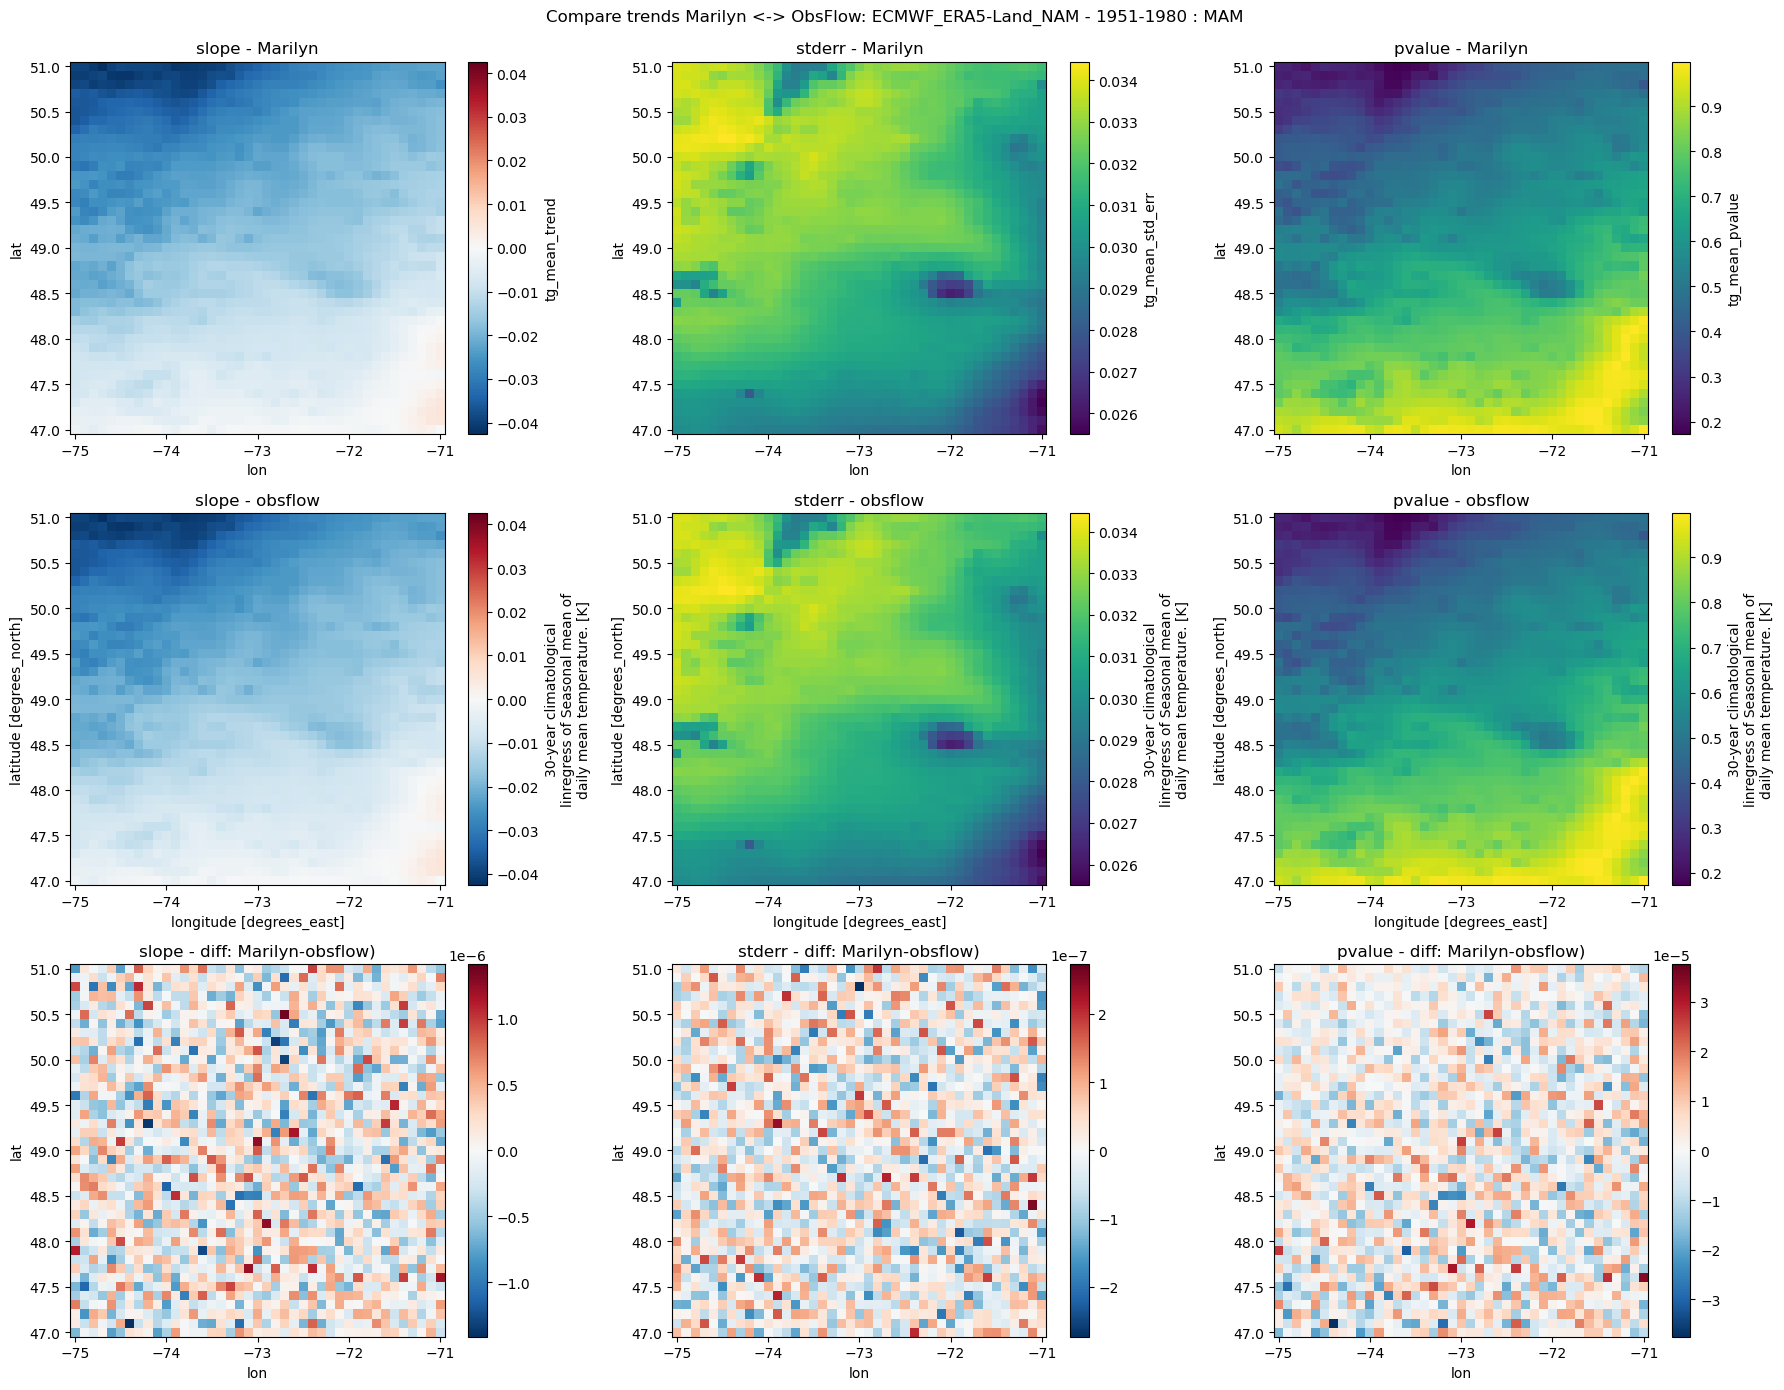

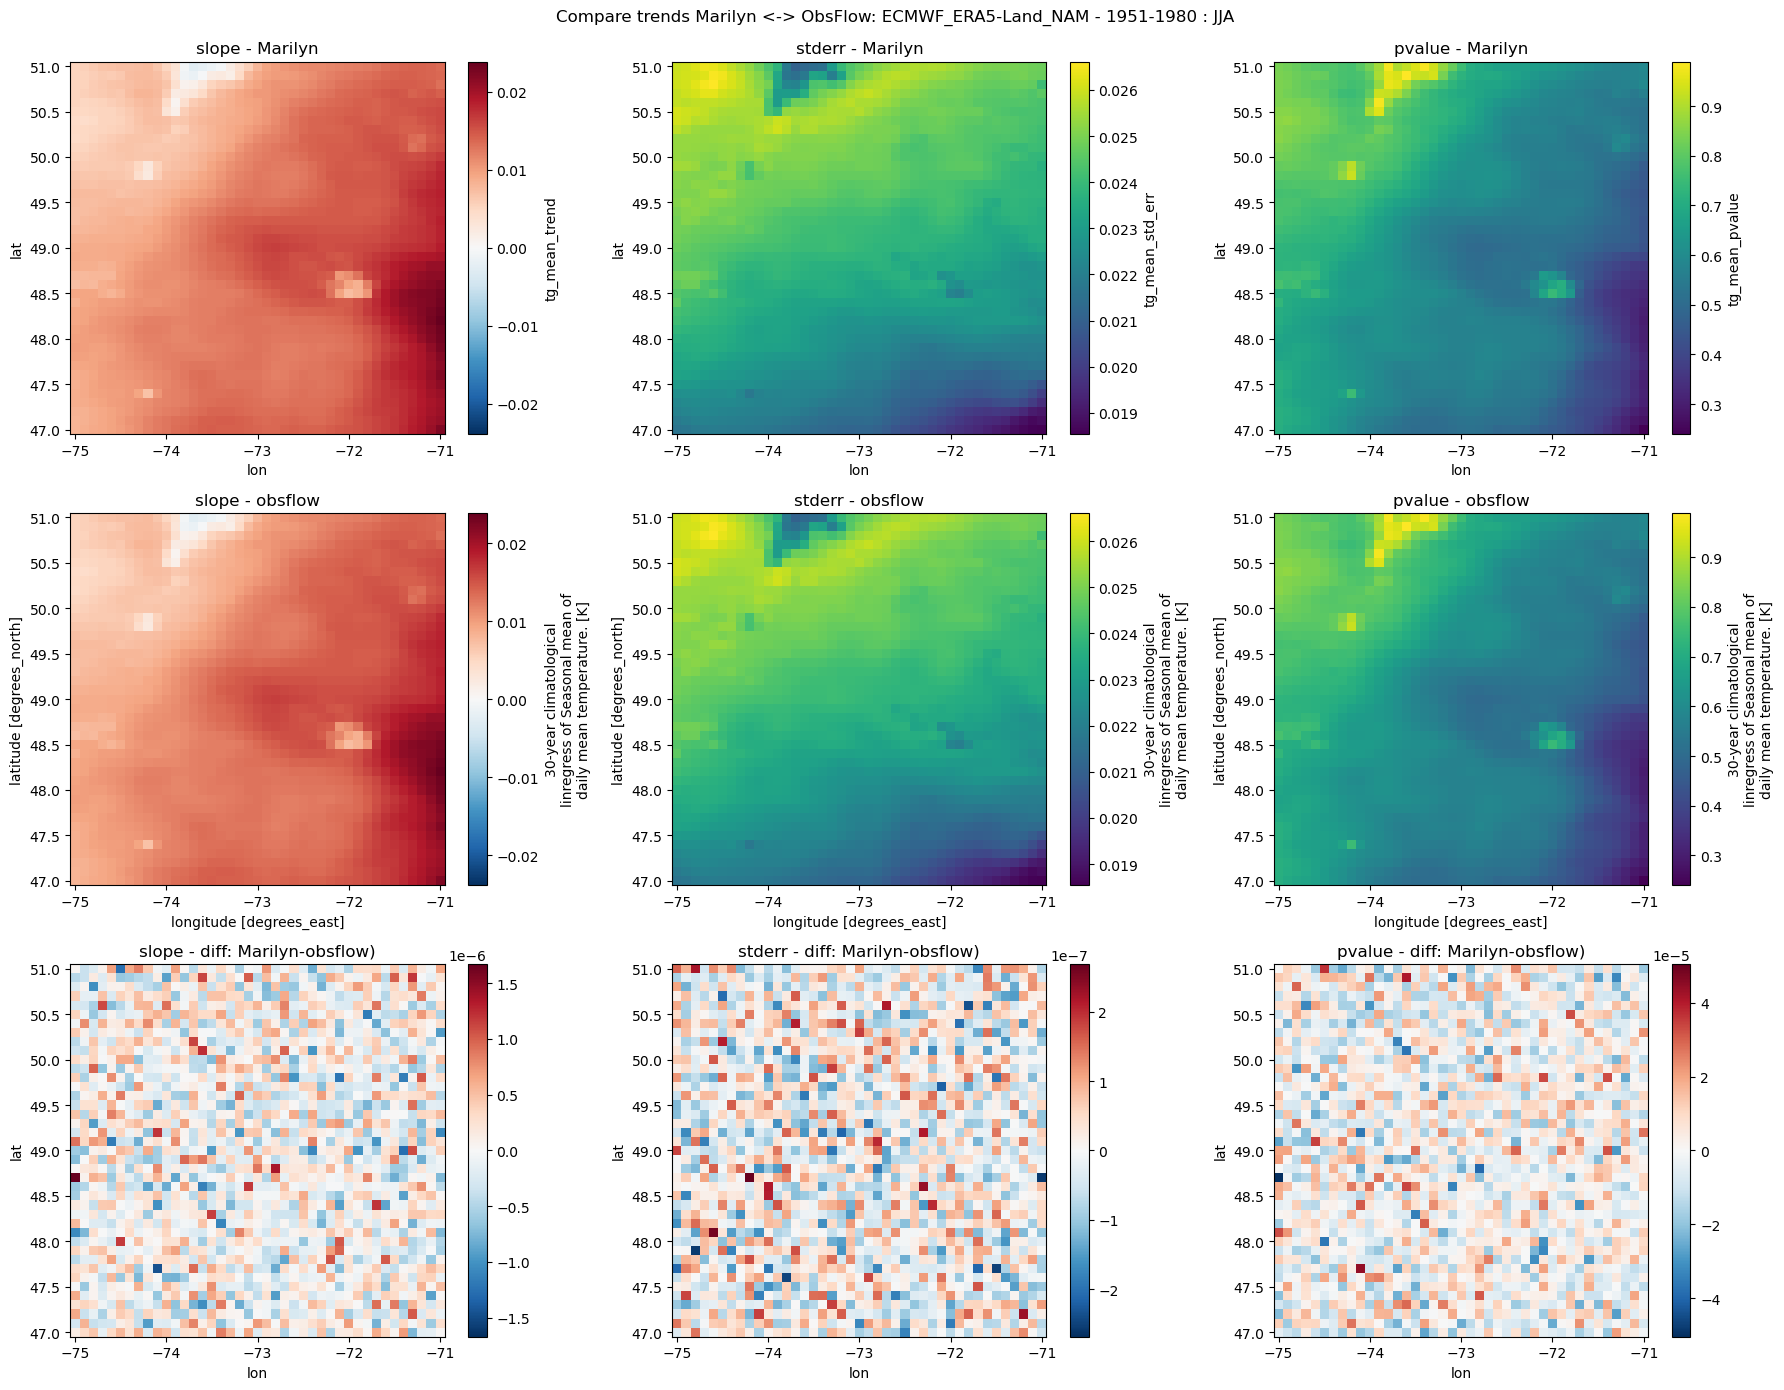

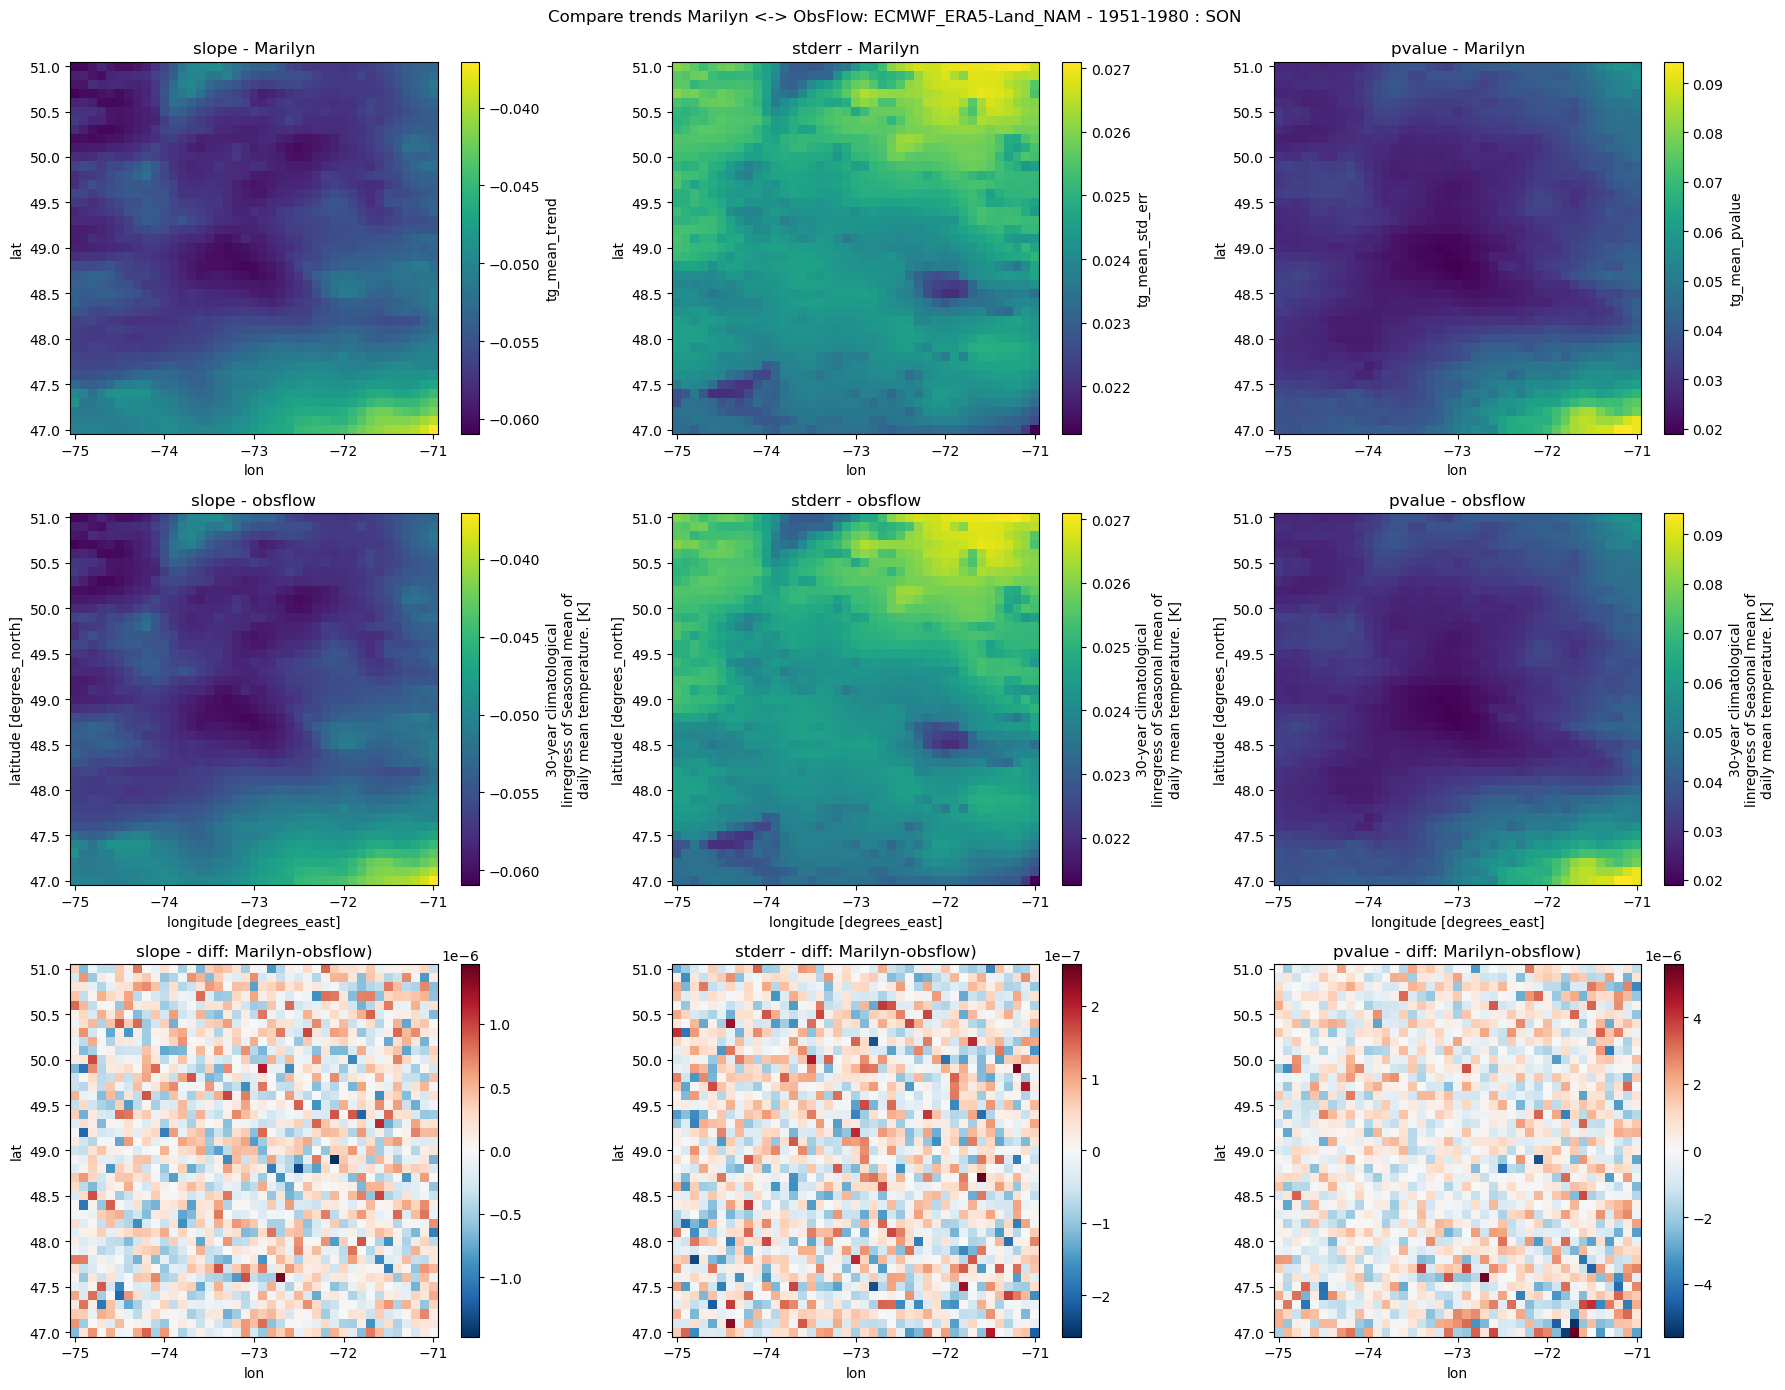

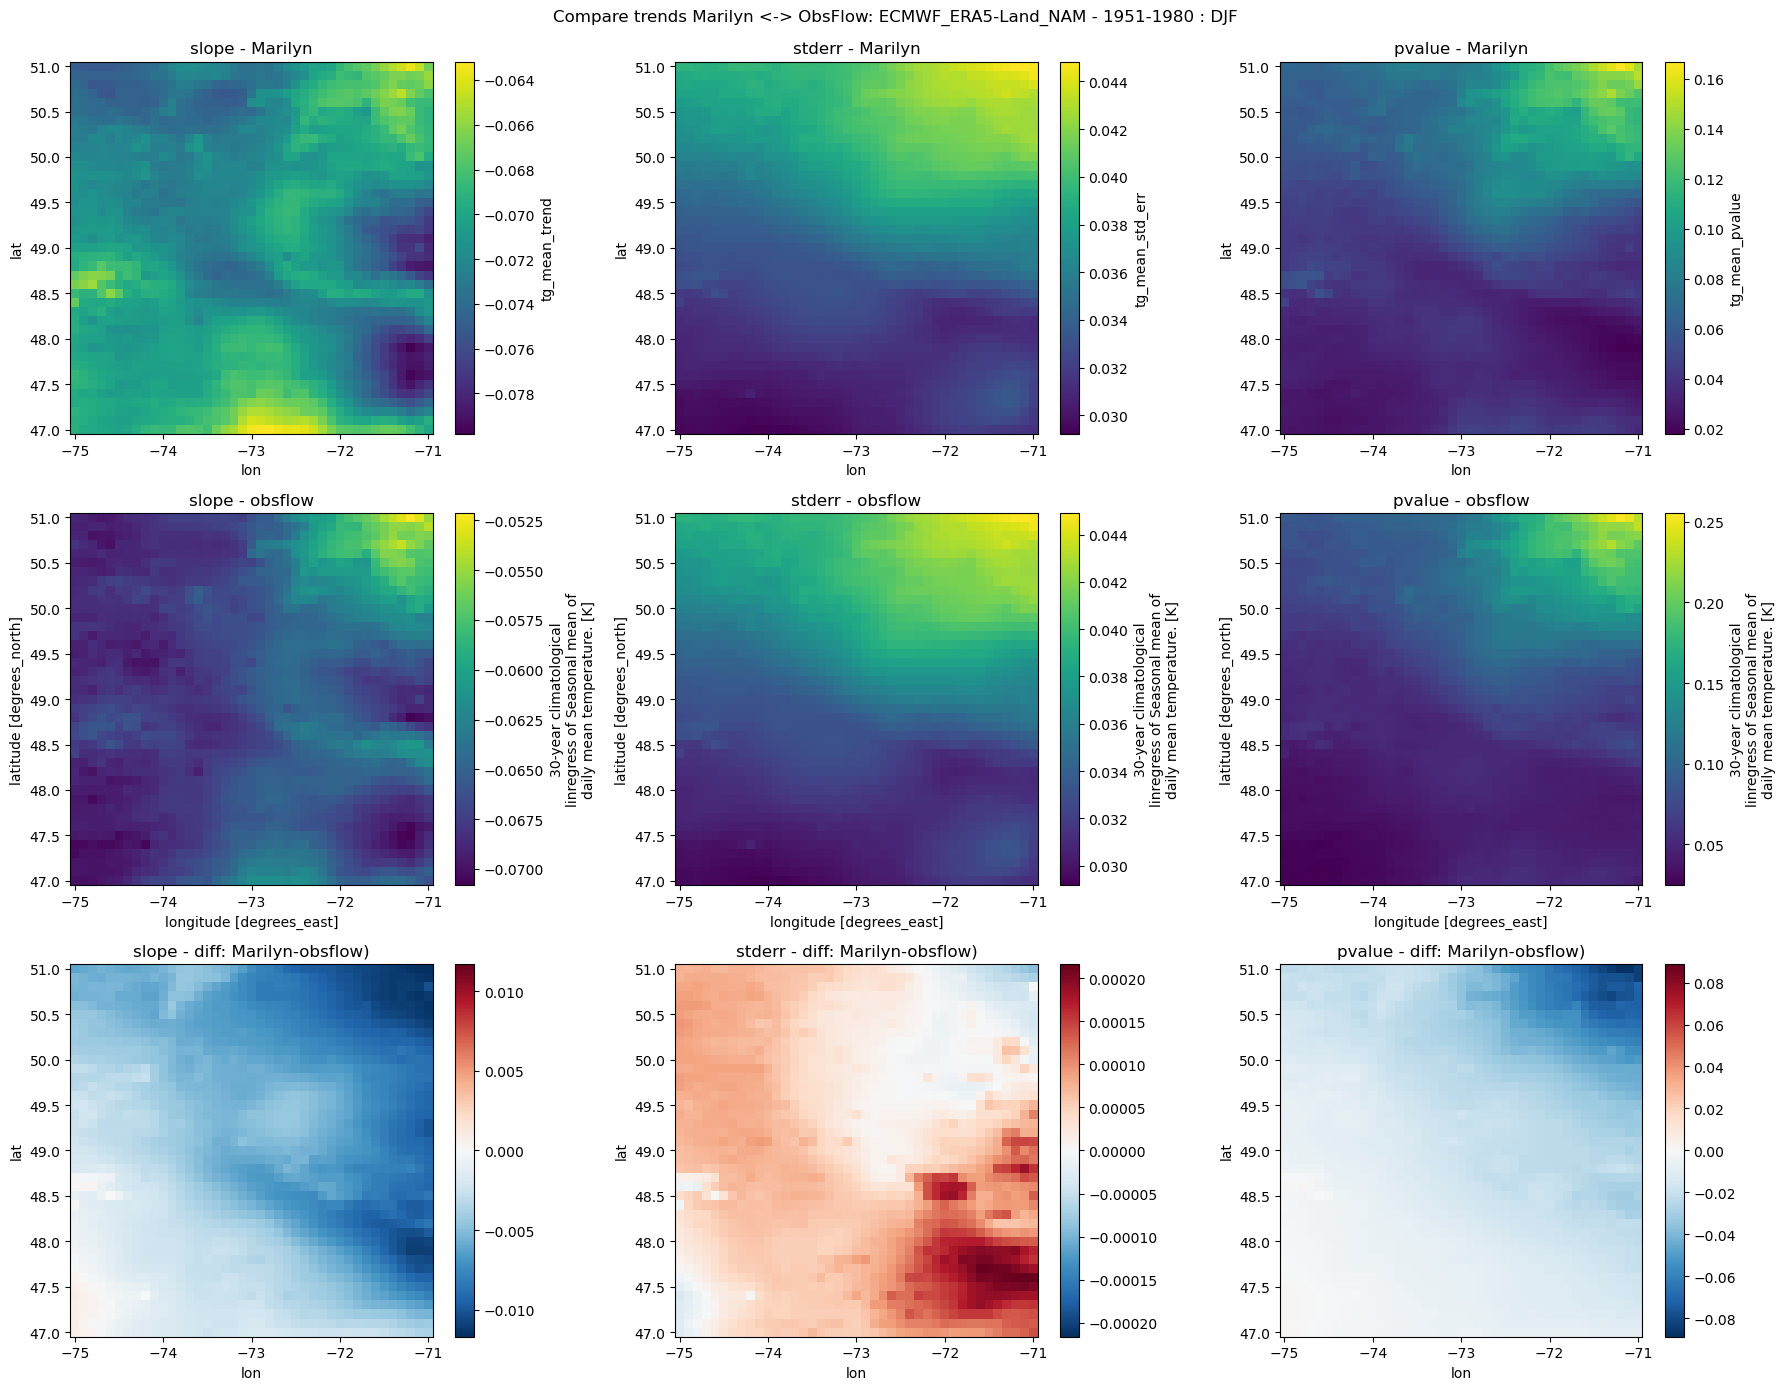

'ECMWF_ERA5-Land_NAM season Marilyn'

<xarray.Dataset>
Dimensions:          (lat: 41, lon: 41, season: 4)
Coordinates:
  * lat              (lat) float32 47.0 47.1 47.2 47.3 ... 50.7 50.8 50.9 51.0
  * lon              (lon) float32 -75.0 -74.9 -74.8 -74.7 ... -71.2 -71.1 -71.0
  * season           (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    tg_mean_pvalue   (season, lat, lon) float64 ...
    tg_mean_std_err  (season, lat, lon) float64 ...
    tg_mean_trend    (season, lat, lon) float64 ...
    tn_mean_pvalue   (season, lat, lon) float64 ...
    tn_mean_std_err  (season, lat, lon) float64 ...
    tn_mean_trend    (season, lat, lon) float64 ...
    tx_mean_pvalue   (season, lat, lon) float64 ...
    tx_mean_std_err  (season, lat, lon) float64 ...
    tx_mean_trend    (season, lat, lon) float64 ...
Attributes:
    description:  Linear least-squares regression for monthly values
    end_date:     1990-11-30
    start_date:   1960-11-30
    units:        (unit of variables)/year

'ECMWF_ERA5-Land_NAM season obsflow'

<xarray.Dataset>
Dimensions:                  (lat: 41, linreg_param: 6, lon: 41, period: 6,
                              season: 4)
Coordinates:
  * lat                      (lat) float32 47.0 47.1 47.2 ... 50.8 50.9 51.0
  * linreg_param             (linreg_param) <U16 'slope' ... 'intercept_stderr'
  * lon                      (lon) float32 -75.0 -74.9 -74.8 ... -71.1 -71.0
  * period                   (period) object '1951-1980' ... '1991-2020'
  * season                   (season) <U3 'MAM' 'JJA' 'SON' 'DJF'
    time                     (period, season) datetime64[ns] dask.array<chunksize=(6, 4), meta=np.ndarray>
Data variables: (12/15)
    tg_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    tg_mean_clim_mean        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_mean_clim_std         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_std_clim_mean         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tn_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    ...                       ...
    tn_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    tx_mean_clim_mean        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_mean_clim_std         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_std_clim_mean         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-01 00:00:00
    cat:date_start:          1950-03-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           qtr
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

Display the datasets and their difference


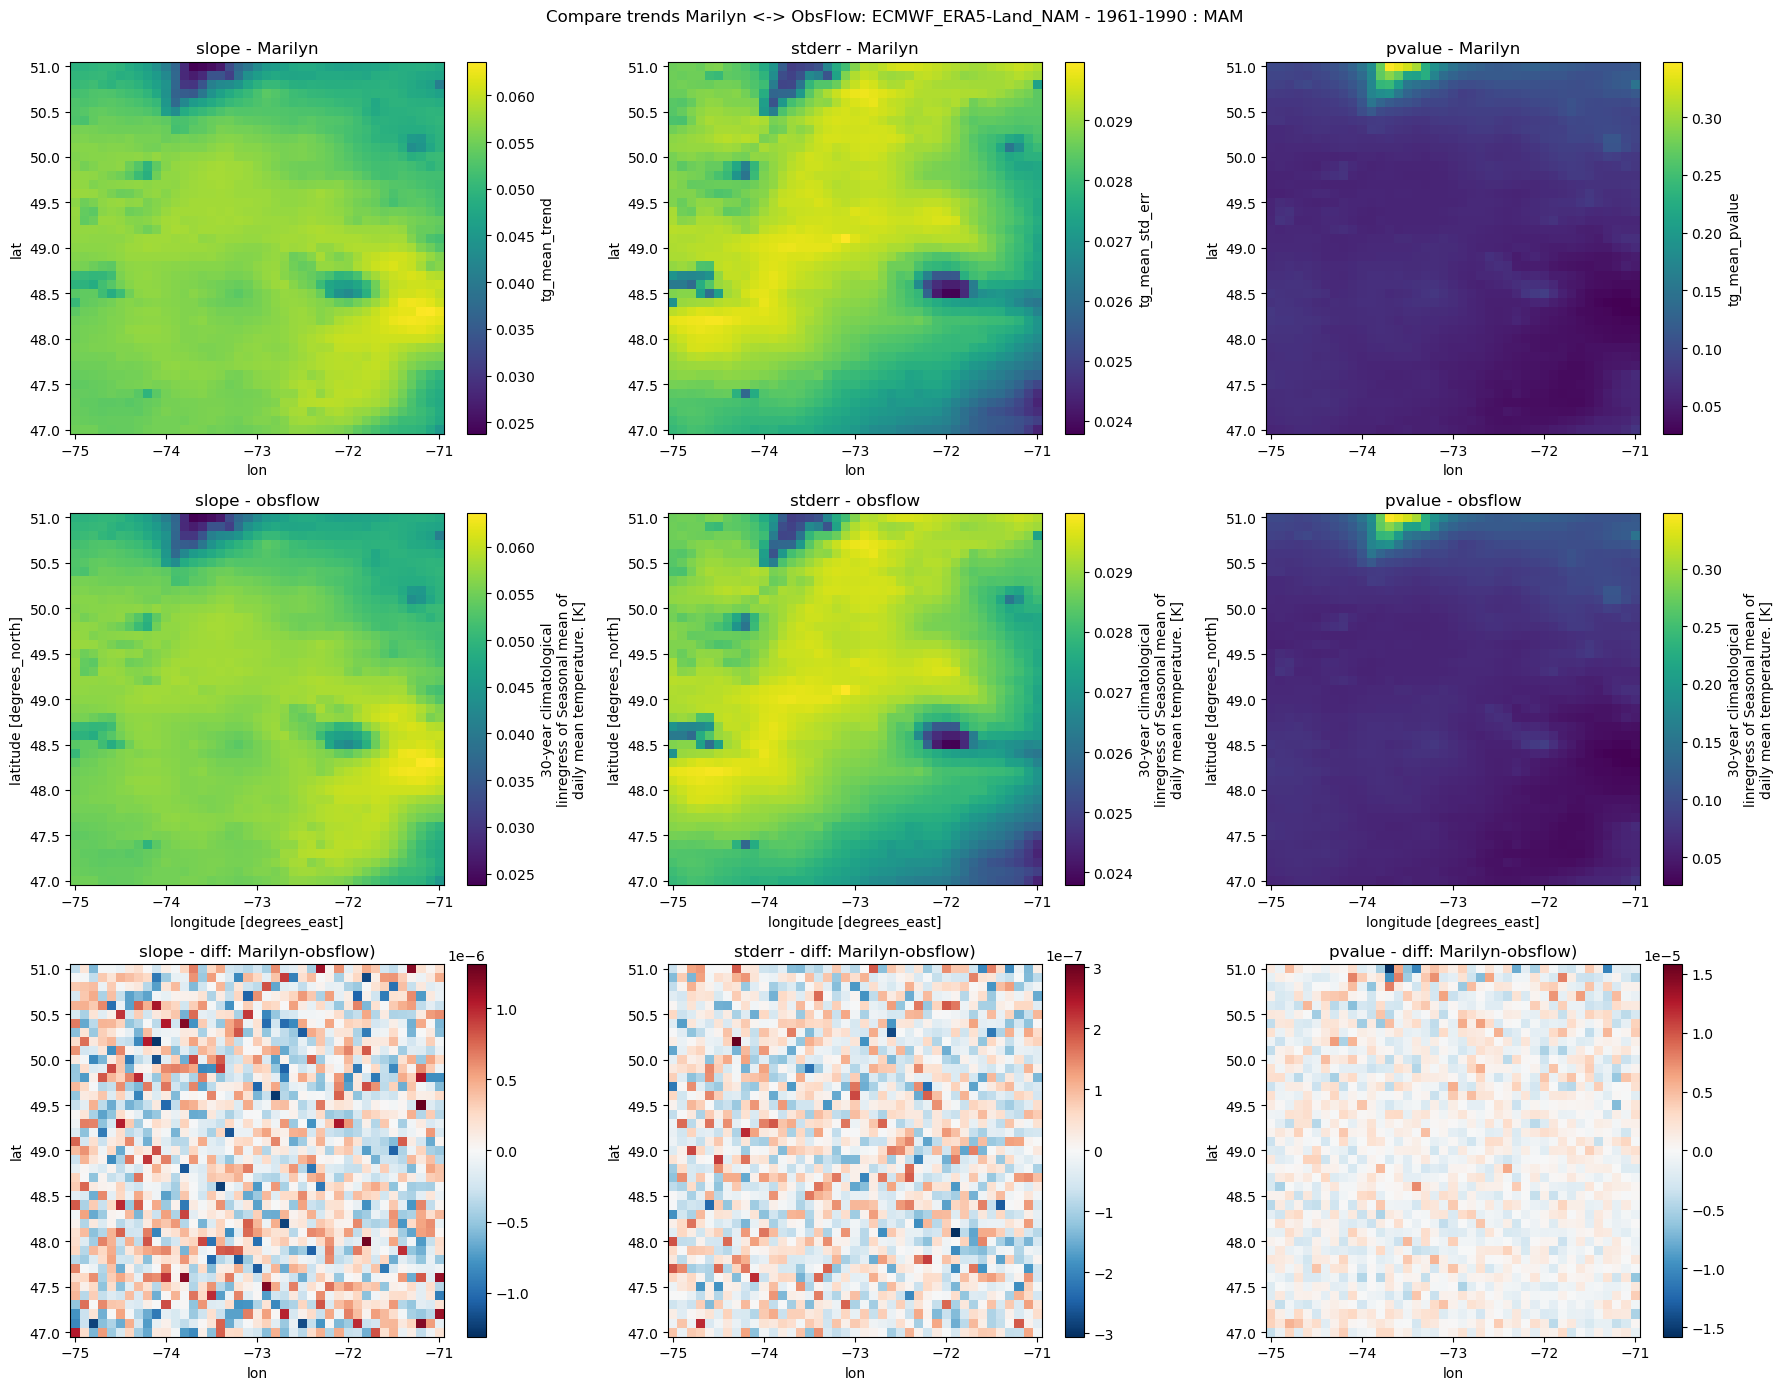

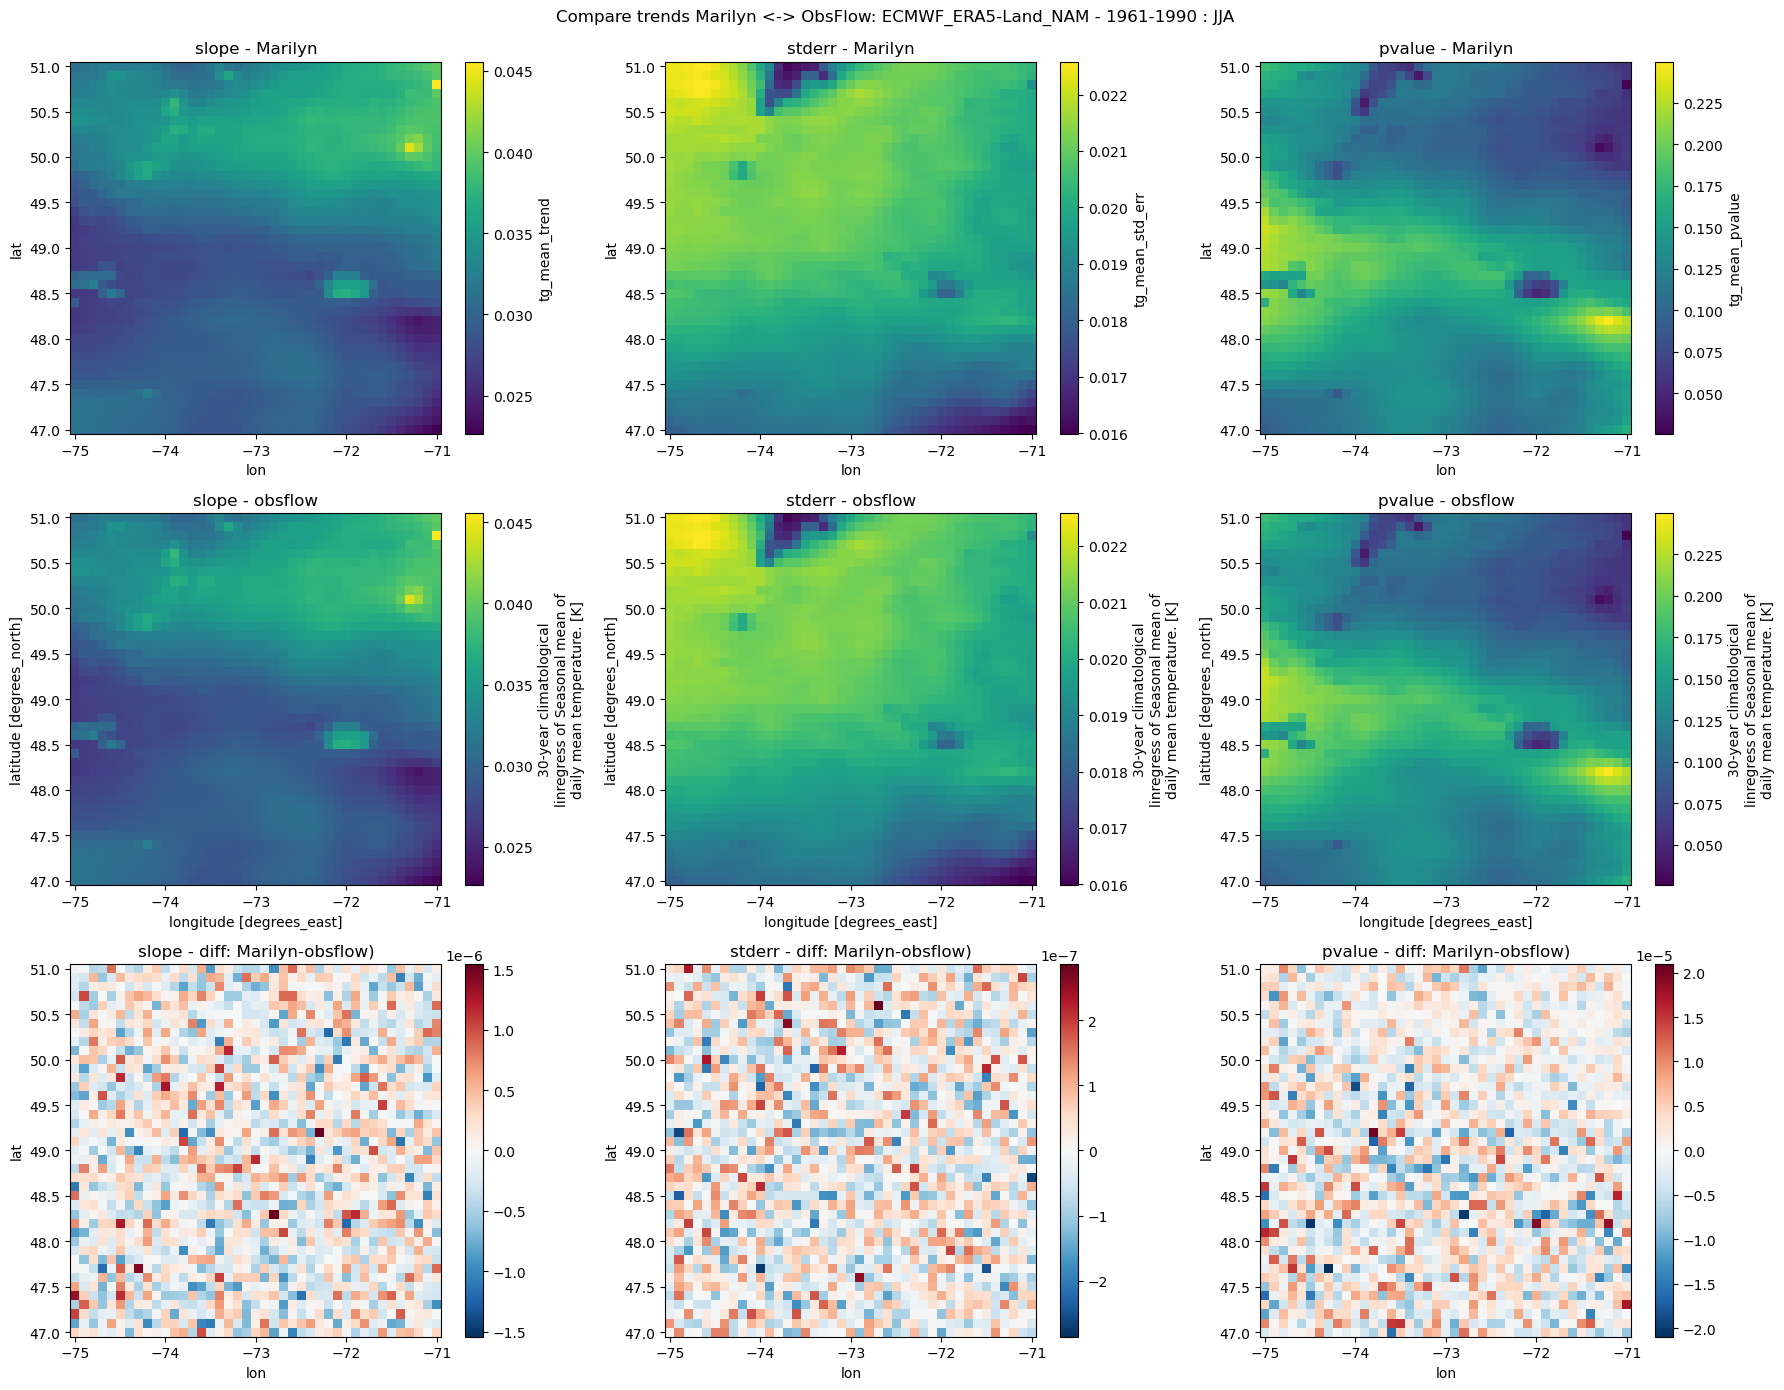

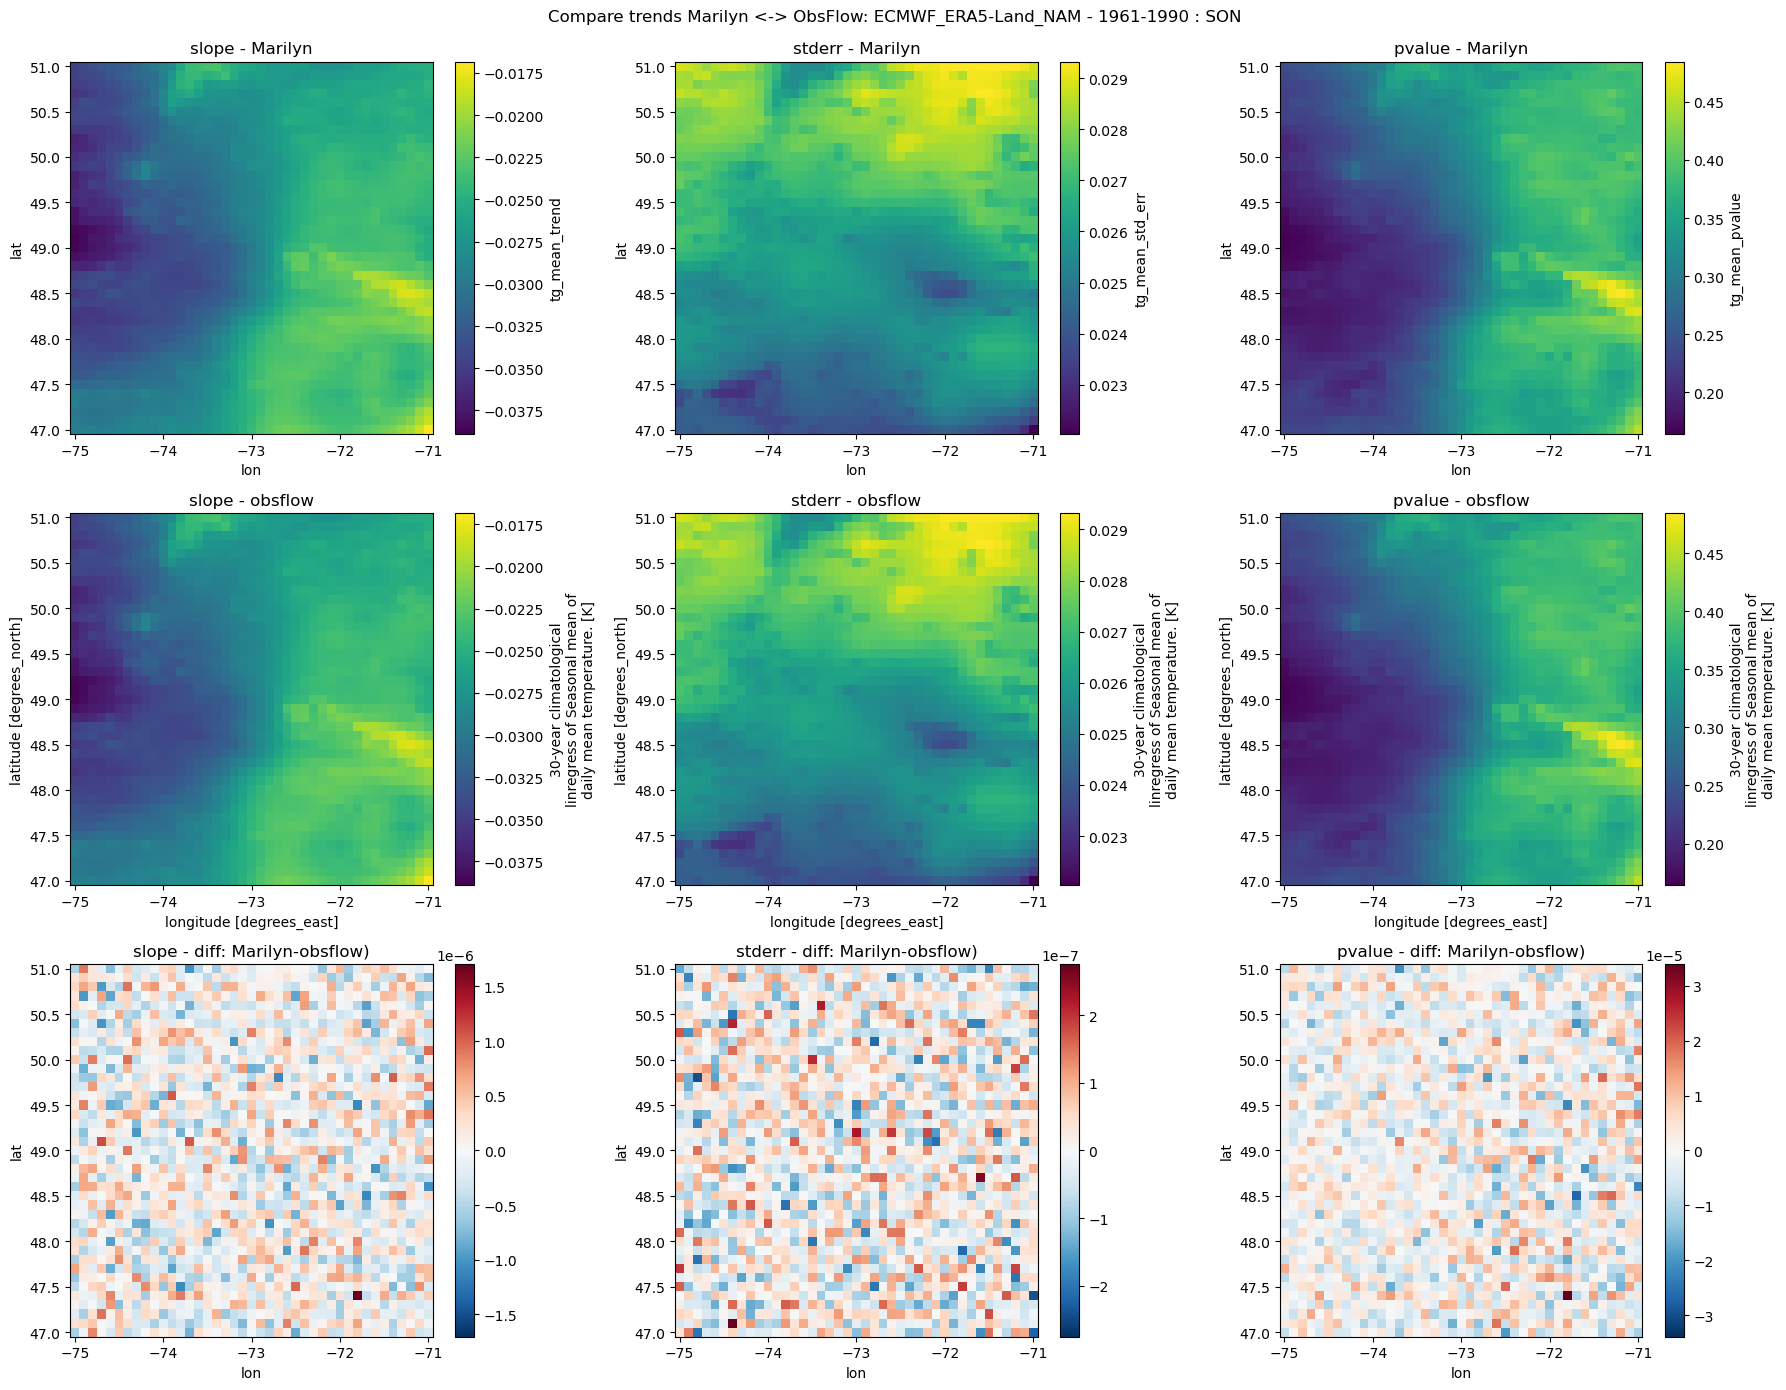

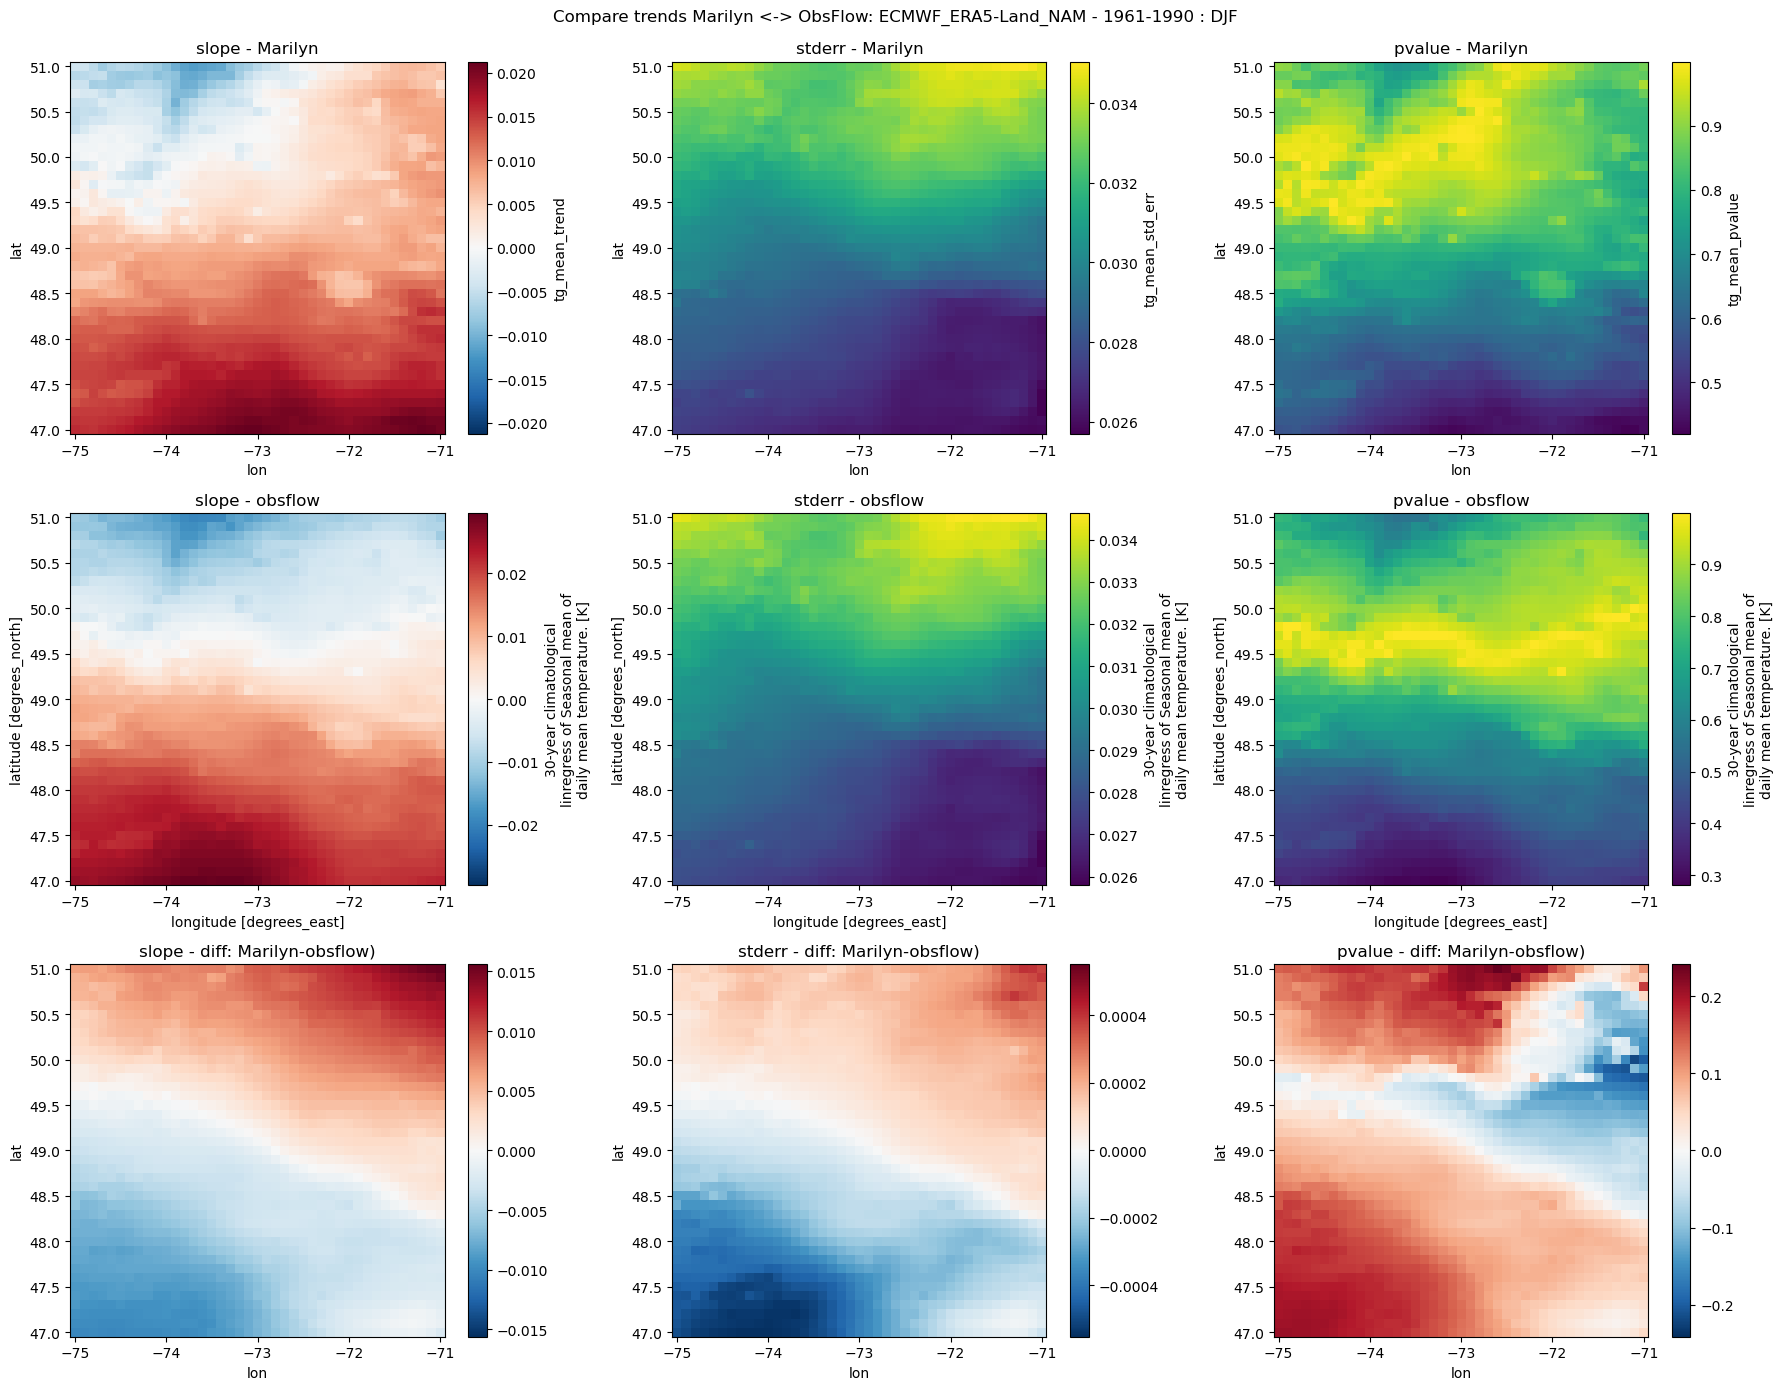

'ECMWF_ERA5-Land_NAM season Marilyn'

<xarray.Dataset>
Dimensions:          (lat: 41, lon: 41, season: 4)
Coordinates:
  * lat              (lat) float32 47.0 47.1 47.2 47.3 ... 50.7 50.8 50.9 51.0
  * lon              (lon) float32 -75.0 -74.9 -74.8 -74.7 ... -71.2 -71.1 -71.0
  * season           (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    tg_mean_pvalue   (season, lat, lon) float64 ...
    tg_mean_std_err  (season, lat, lon) float64 ...
    tg_mean_trend    (season, lat, lon) float64 ...
    tn_mean_pvalue   (season, lat, lon) float64 ...
    tn_mean_std_err  (season, lat, lon) float64 ...
    tn_mean_trend    (season, lat, lon) float64 ...
    tx_mean_pvalue   (season, lat, lon) float64 ...
    tx_mean_std_err  (season, lat, lon) float64 ...
    tx_mean_trend    (season, lat, lon) float64 ...
Attributes:
    description:  Linear least-squares regression for monthly values
    end_date:     2000-11-30
    start_date:   1970-11-30
    units:        (unit of variables)/year

'ECMWF_ERA5-Land_NAM season obsflow'

<xarray.Dataset>
Dimensions:                  (lat: 41, linreg_param: 6, lon: 41, period: 6,
                              season: 4)
Coordinates:
  * lat                      (lat) float32 47.0 47.1 47.2 ... 50.8 50.9 51.0
  * linreg_param             (linreg_param) <U16 'slope' ... 'intercept_stderr'
  * lon                      (lon) float32 -75.0 -74.9 -74.8 ... -71.1 -71.0
  * period                   (period) object '1951-1980' ... '1991-2020'
  * season                   (season) <U3 'MAM' 'JJA' 'SON' 'DJF'
    time                     (period, season) datetime64[ns] dask.array<chunksize=(6, 4), meta=np.ndarray>
Data variables: (12/15)
    tg_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    tg_mean_clim_mean        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_mean_clim_std         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_std_clim_mean         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tn_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    ...                       ...
    tn_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    tx_mean_clim_mean        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_mean_clim_std         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_std_clim_mean         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-01 00:00:00
    cat:date_start:          1950-03-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           qtr
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

Display the datasets and their difference


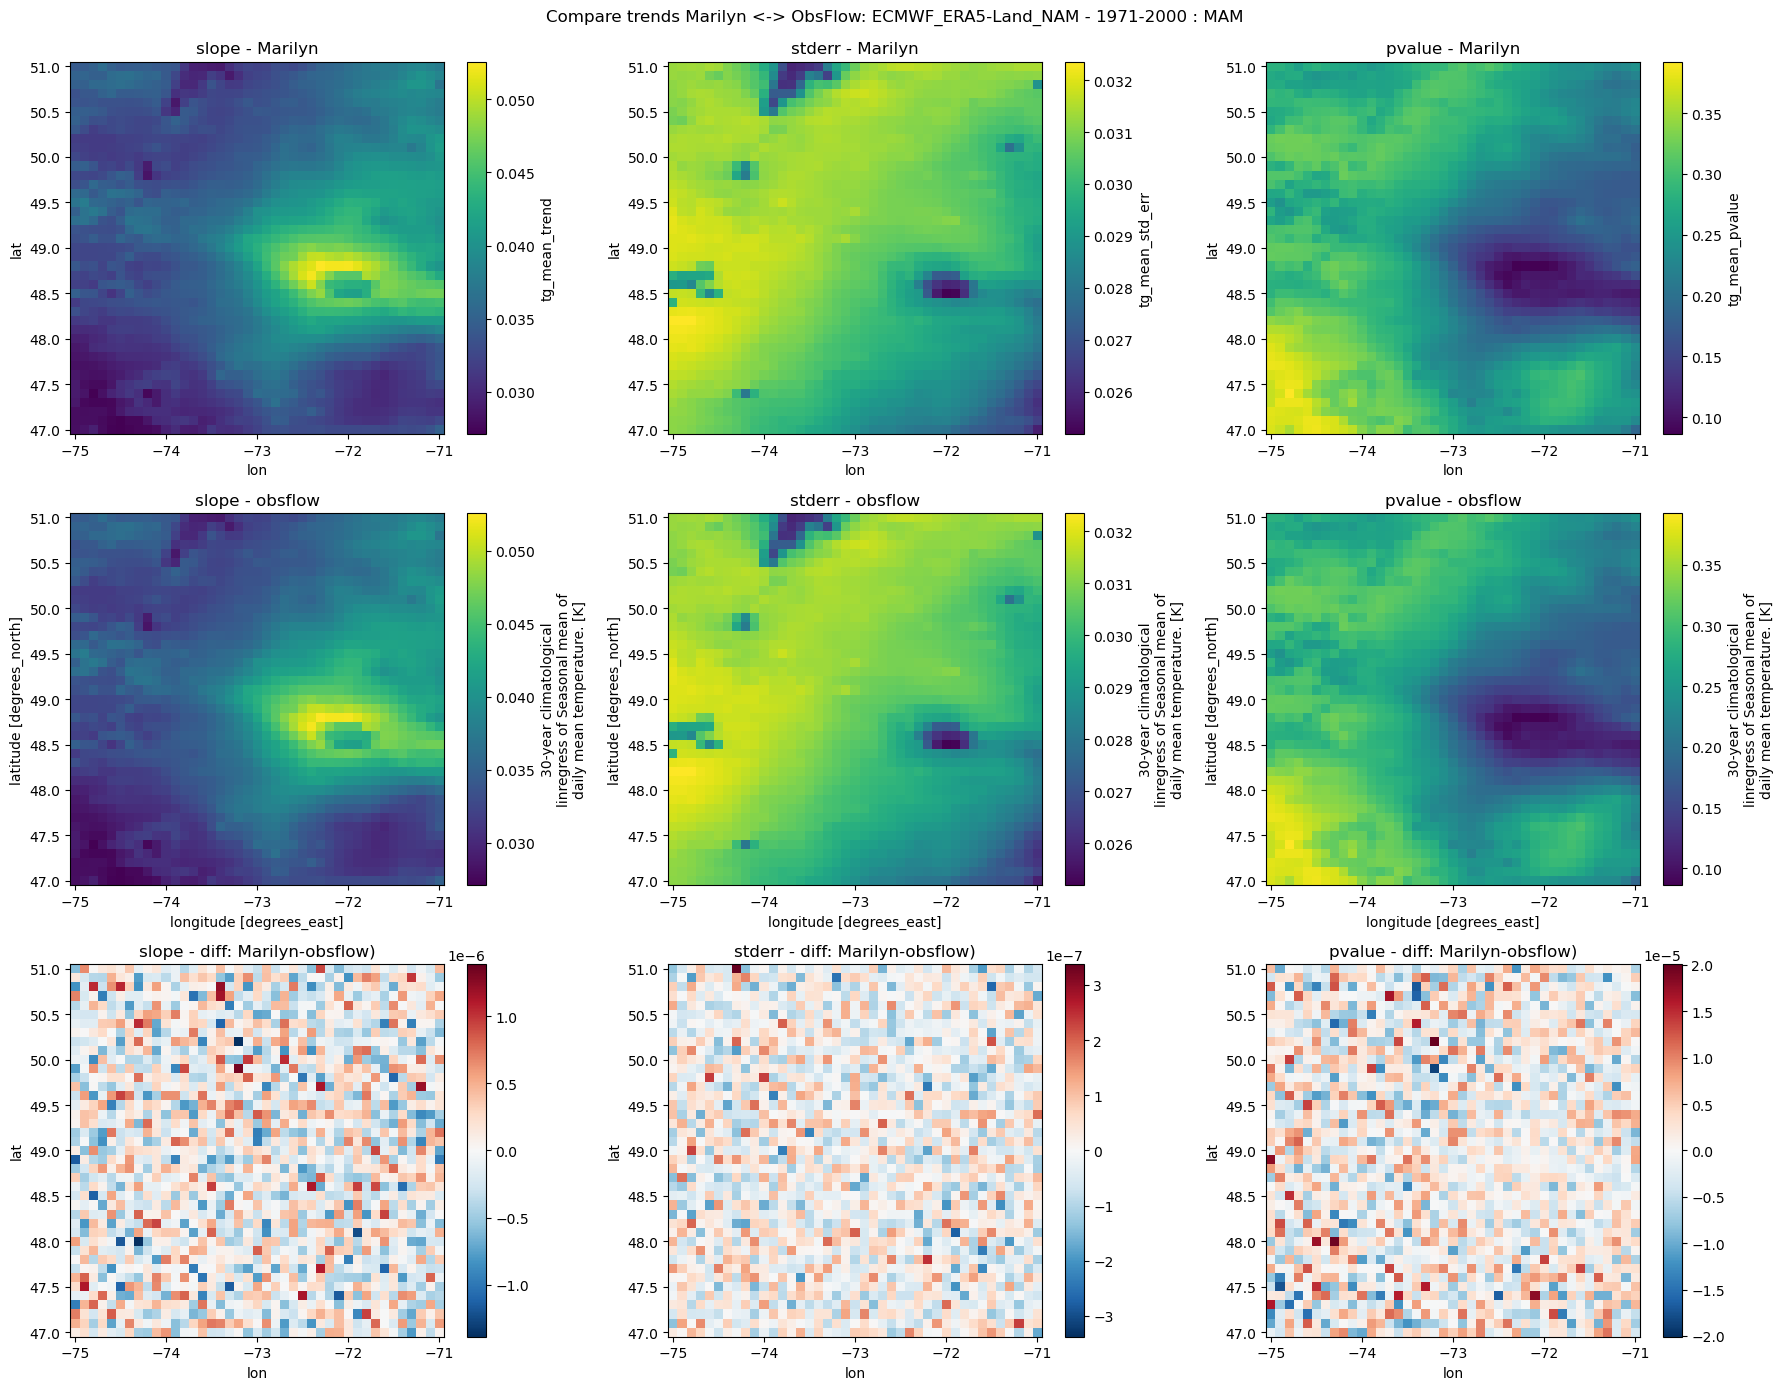

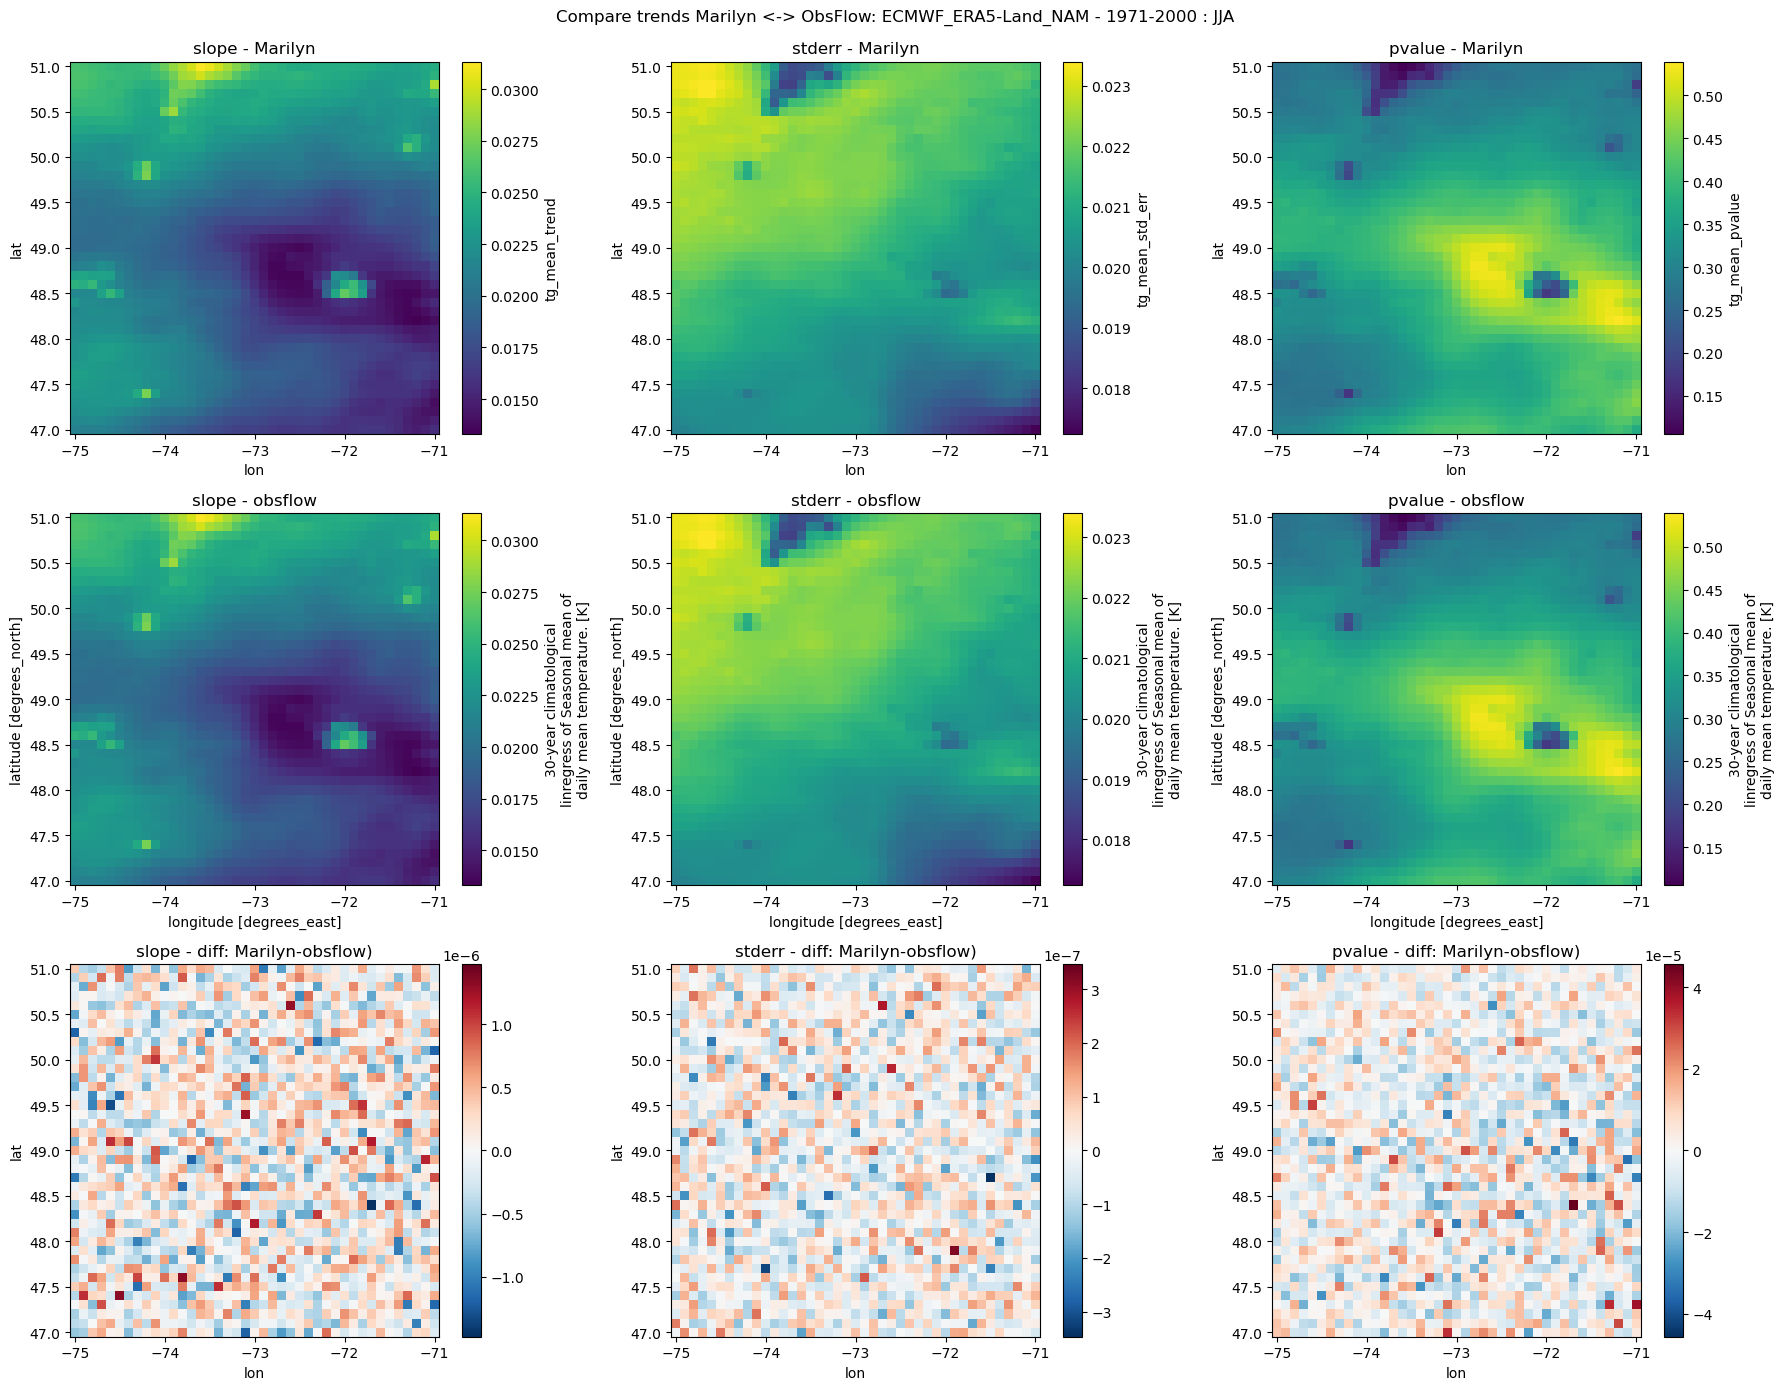

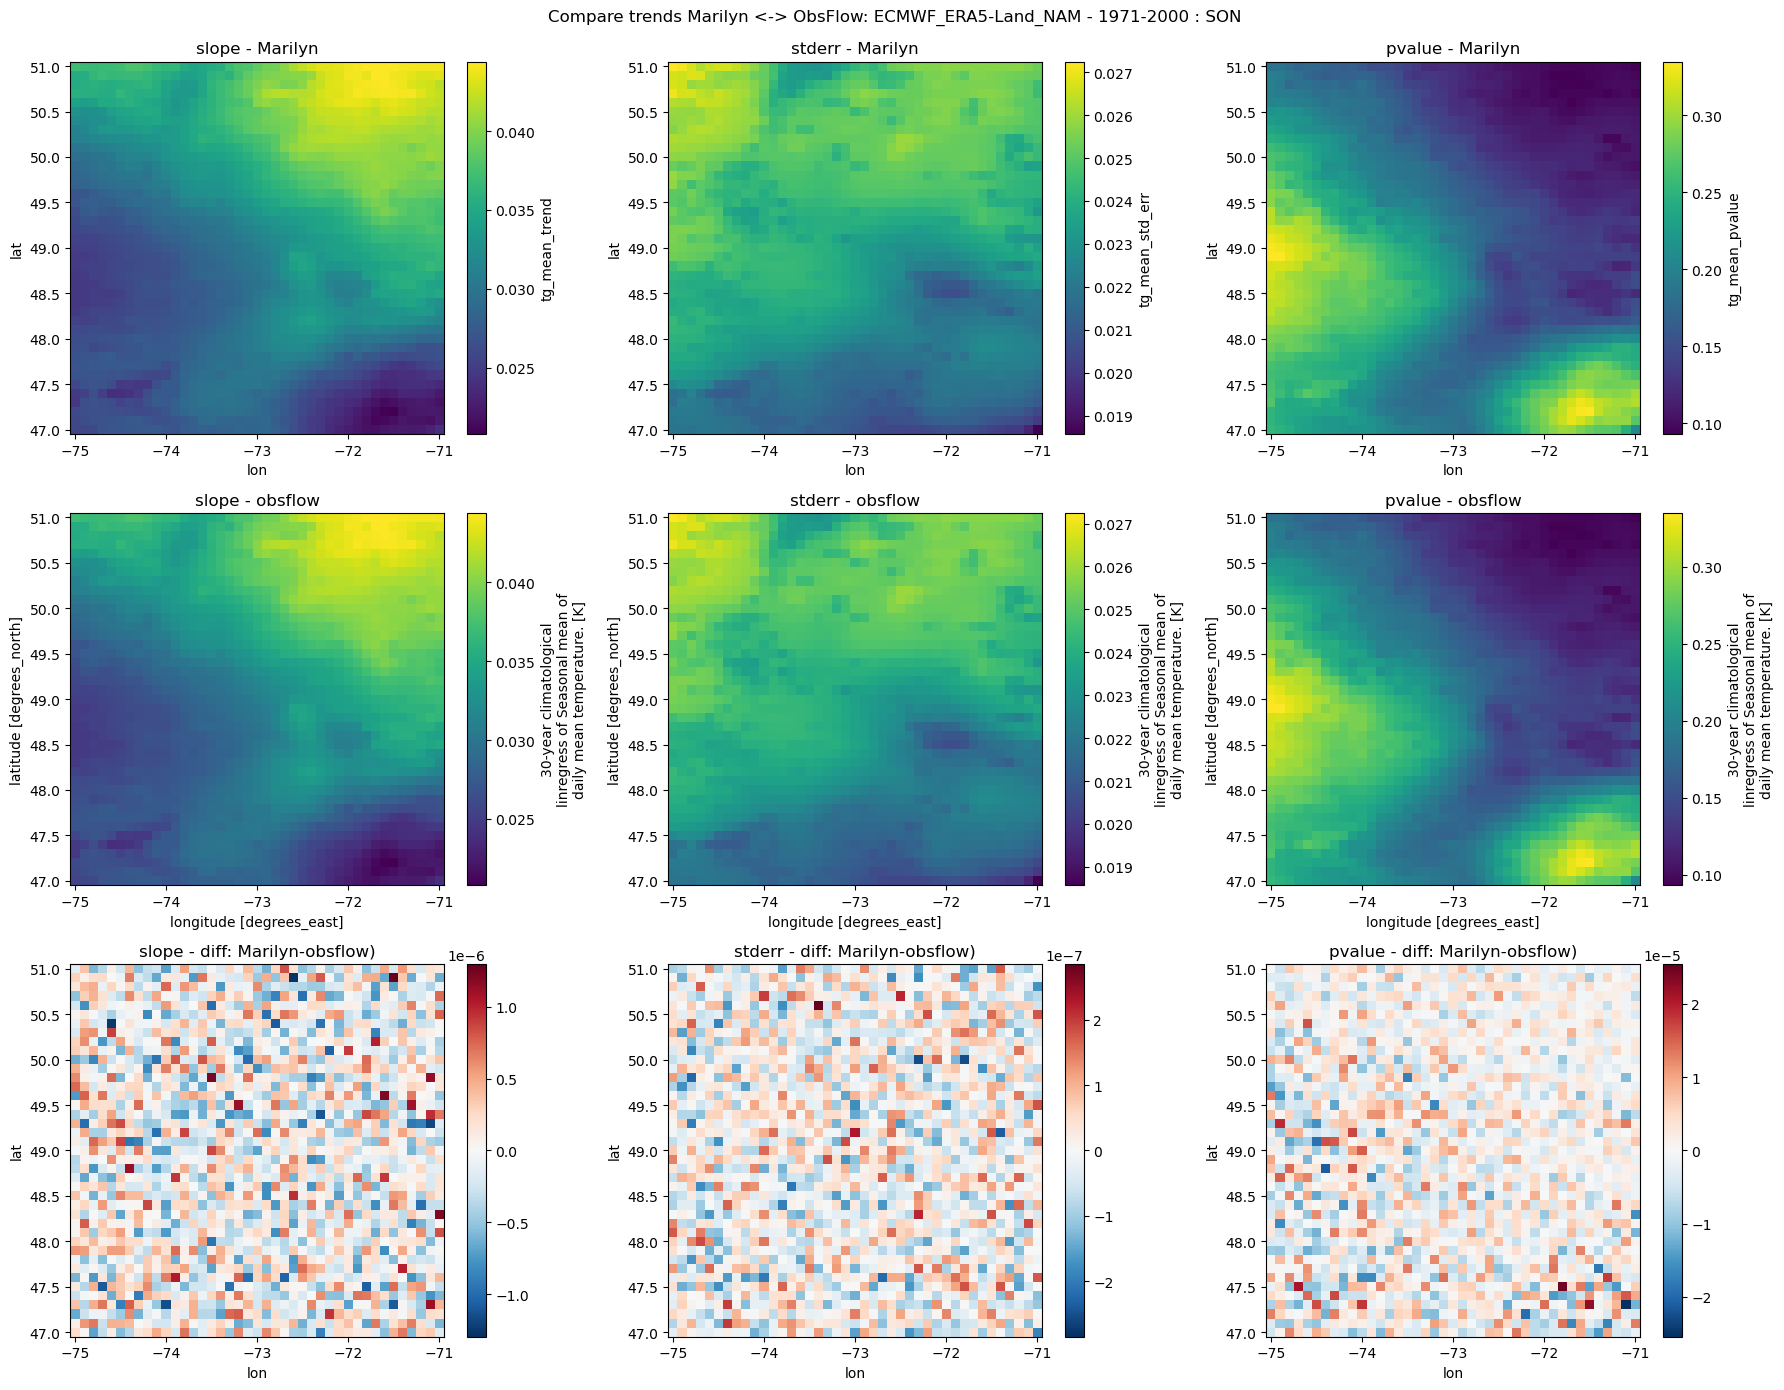

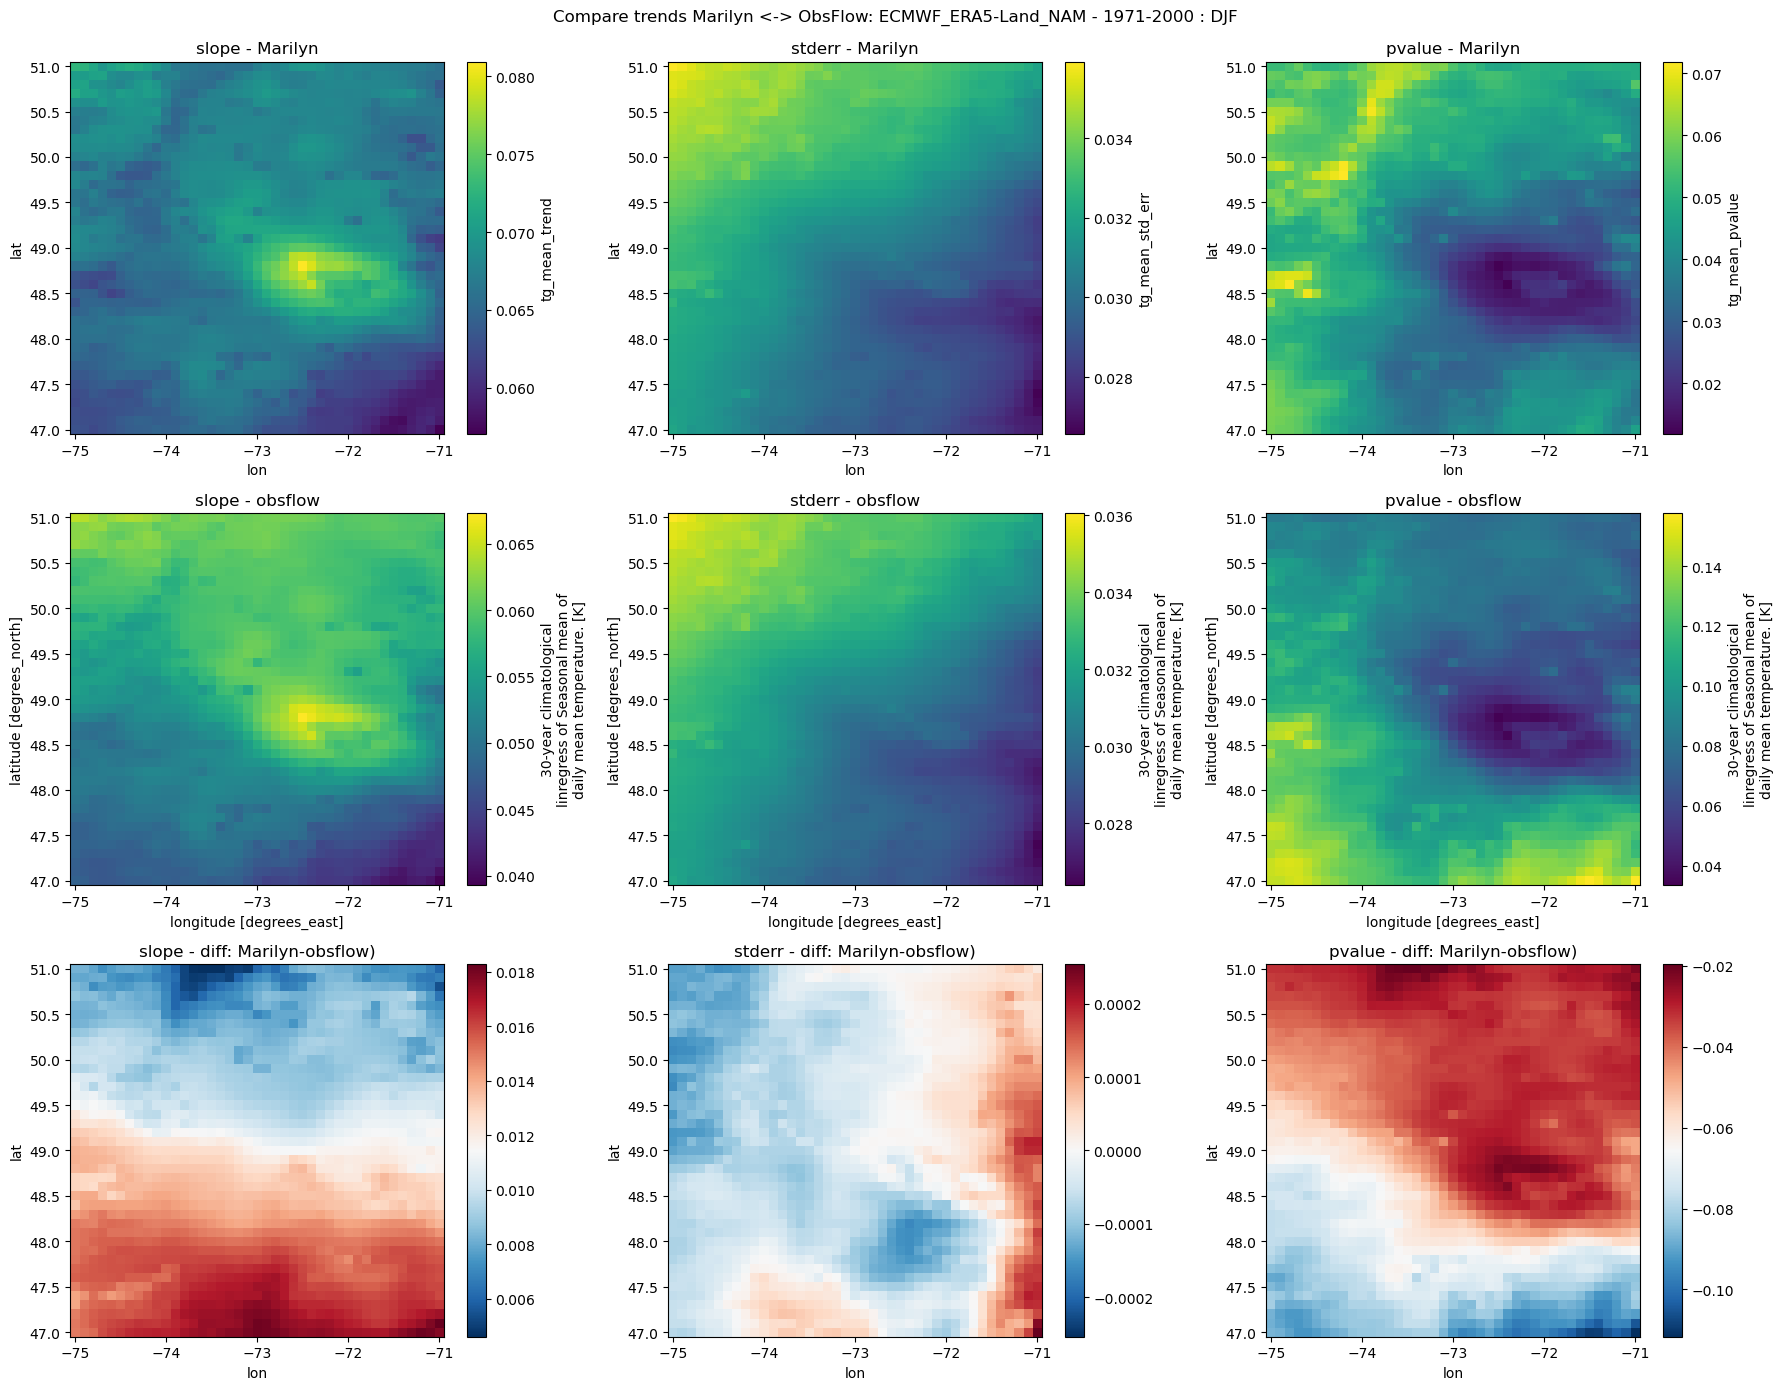

'ECMWF_ERA5-Land_NAM season Marilyn'

<xarray.Dataset>
Dimensions:          (lat: 41, lon: 41, season: 4)
Coordinates:
  * lat              (lat) float32 47.0 47.1 47.2 47.3 ... 50.7 50.8 50.9 51.0
  * lon              (lon) float32 -75.0 -74.9 -74.8 -74.7 ... -71.2 -71.1 -71.0
  * season           (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    tg_mean_pvalue   (season, lat, lon) float64 ...
    tg_mean_std_err  (season, lat, lon) float64 ...
    tg_mean_trend    (season, lat, lon) float64 ...
    tn_mean_pvalue   (season, lat, lon) float64 ...
    tn_mean_std_err  (season, lat, lon) float64 ...
    tn_mean_trend    (season, lat, lon) float64 ...
    tx_mean_pvalue   (season, lat, lon) float64 ...
    tx_mean_std_err  (season, lat, lon) float64 ...
    tx_mean_trend    (season, lat, lon) float64 ...
Attributes:
    description:  Linear least-squares regression for monthly values
    end_date:     2010-11-30
    start_date:   1980-11-30
    units:        (unit of variables)/year

'ECMWF_ERA5-Land_NAM season obsflow'

<xarray.Dataset>
Dimensions:                  (lat: 41, linreg_param: 6, lon: 41, period: 6,
                              season: 4)
Coordinates:
  * lat                      (lat) float32 47.0 47.1 47.2 ... 50.8 50.9 51.0
  * linreg_param             (linreg_param) <U16 'slope' ... 'intercept_stderr'
  * lon                      (lon) float32 -75.0 -74.9 -74.8 ... -71.1 -71.0
  * period                   (period) object '1951-1980' ... '1991-2020'
  * season                   (season) <U3 'MAM' 'JJA' 'SON' 'DJF'
    time                     (period, season) datetime64[ns] dask.array<chunksize=(6, 4), meta=np.ndarray>
Data variables: (12/15)
    tg_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    tg_mean_clim_mean        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_mean_clim_std         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_std_clim_mean         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tn_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    ...                       ...
    tn_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    tx_mean_clim_mean        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_mean_clim_std         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_std_clim_mean         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-01 00:00:00
    cat:date_start:          1950-03-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           qtr
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

Display the datasets and their difference


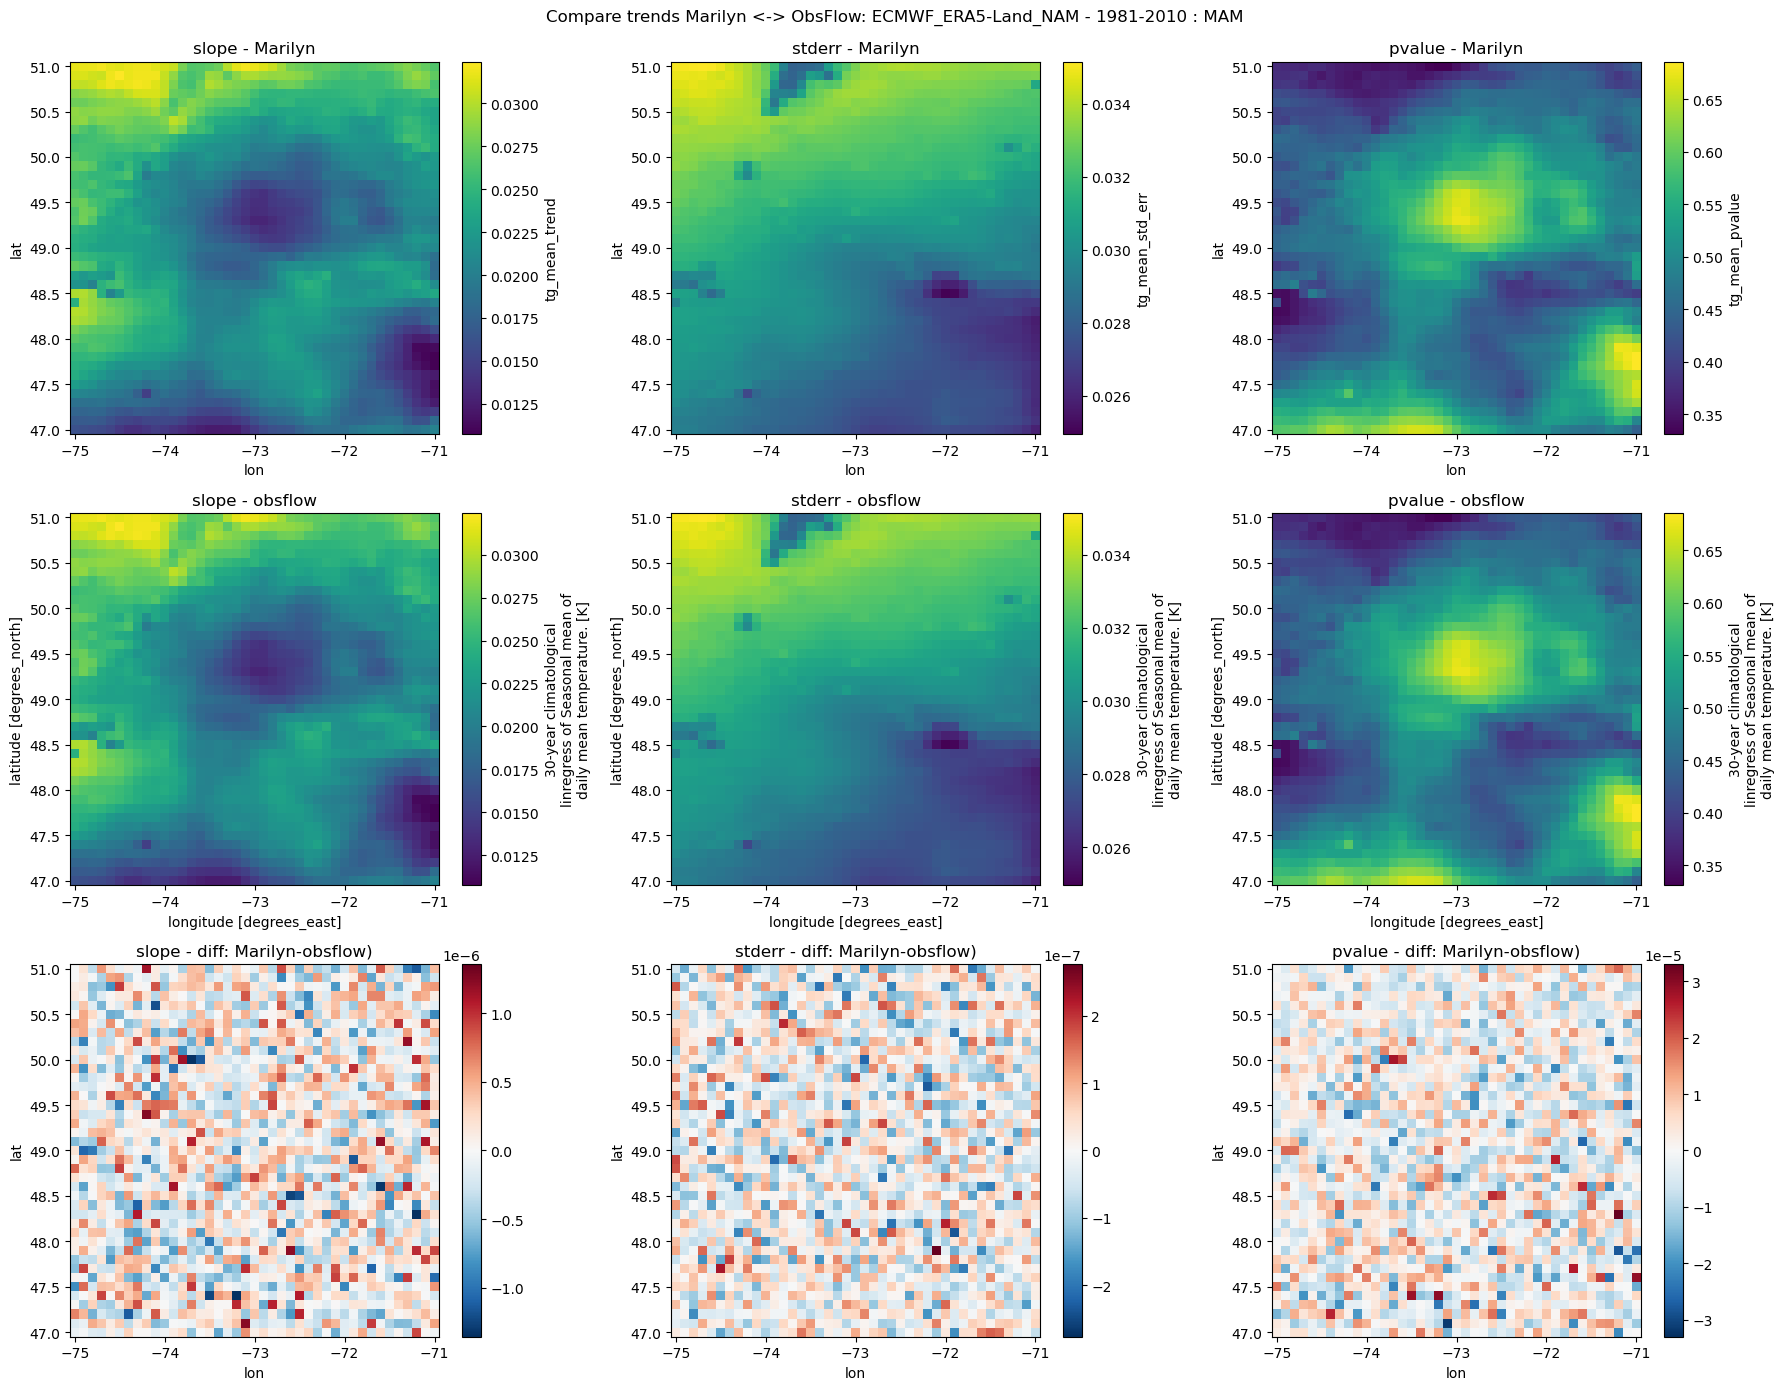

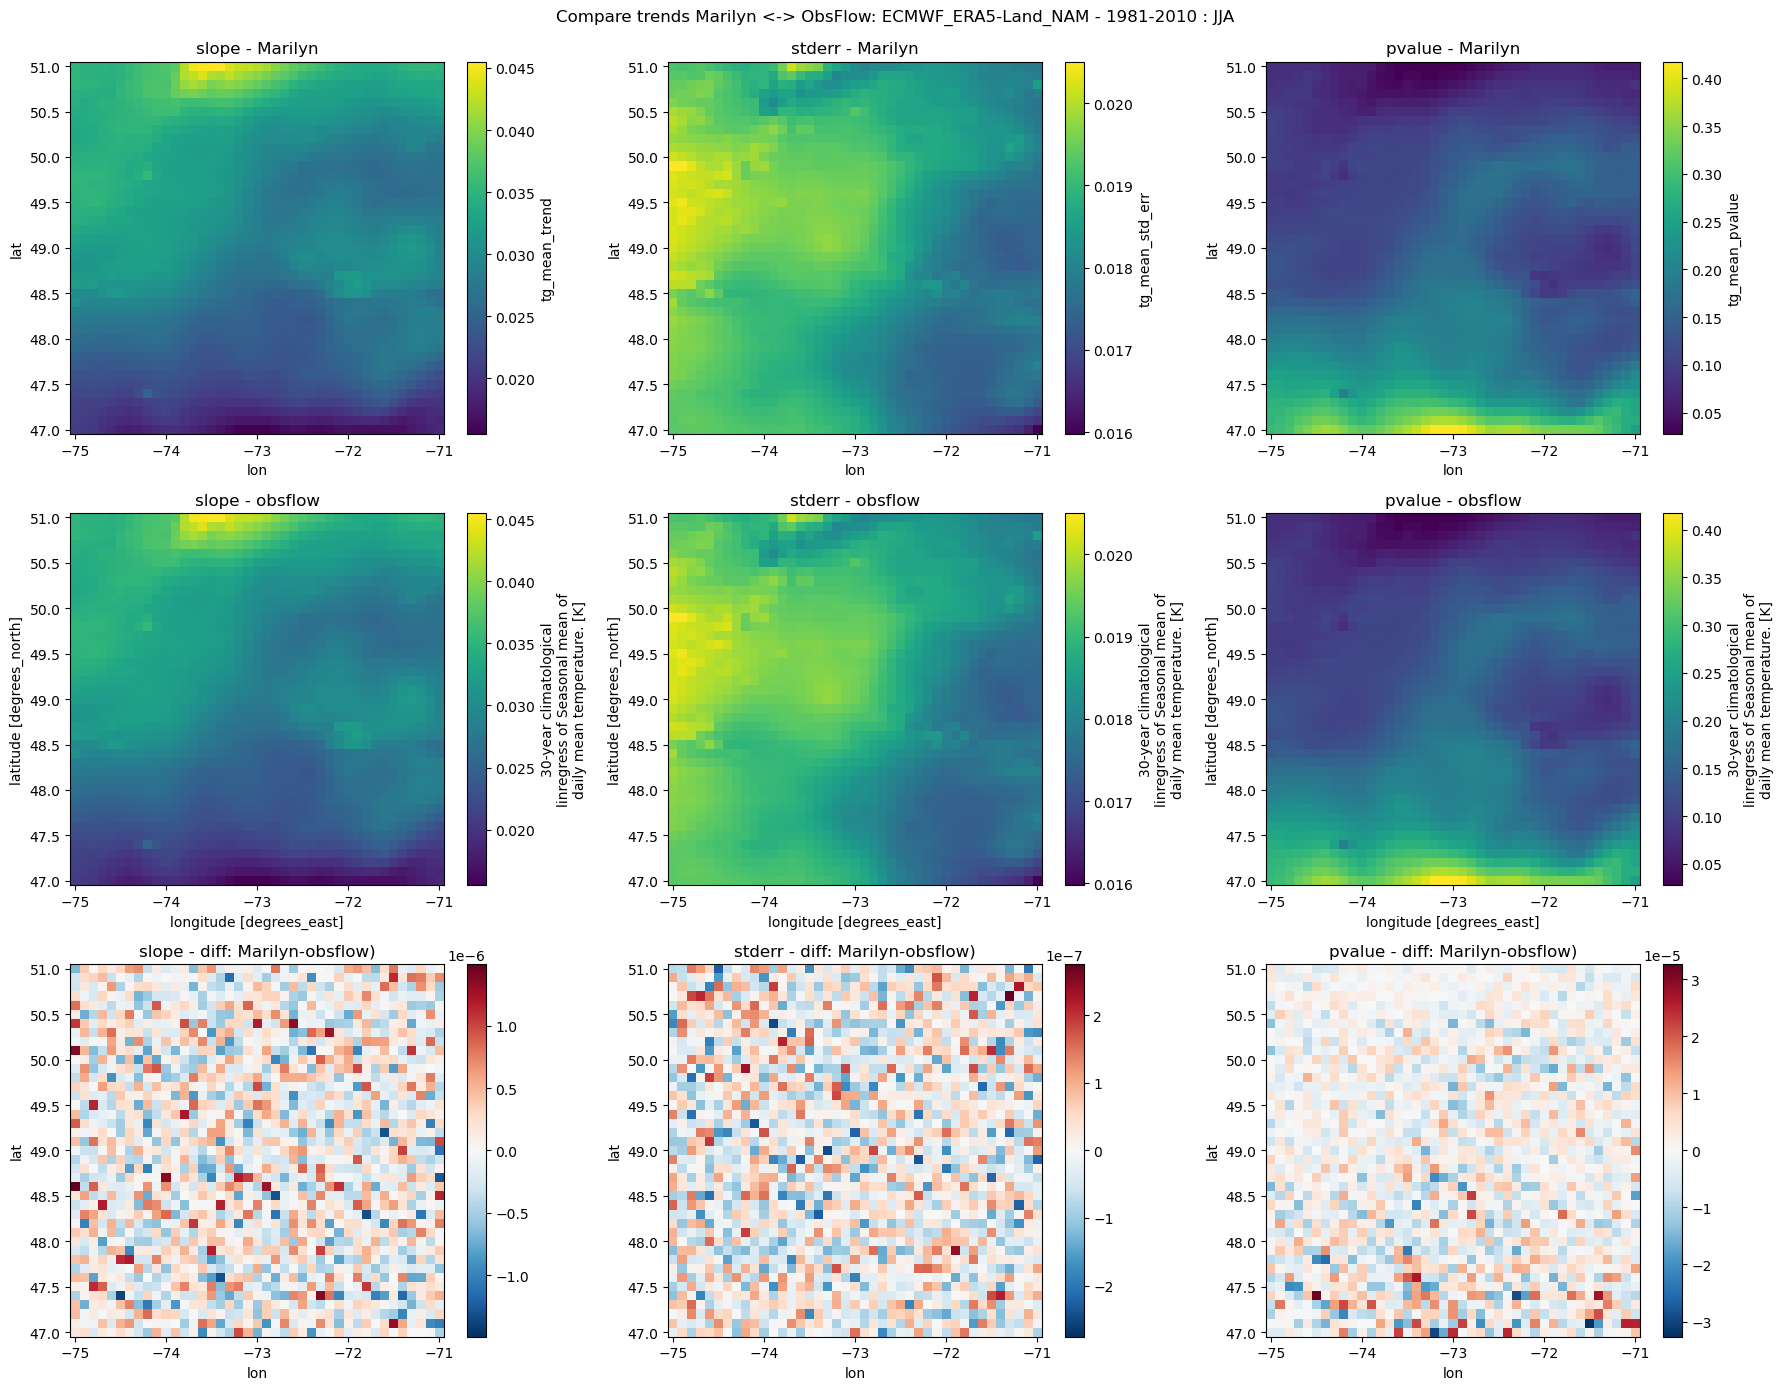

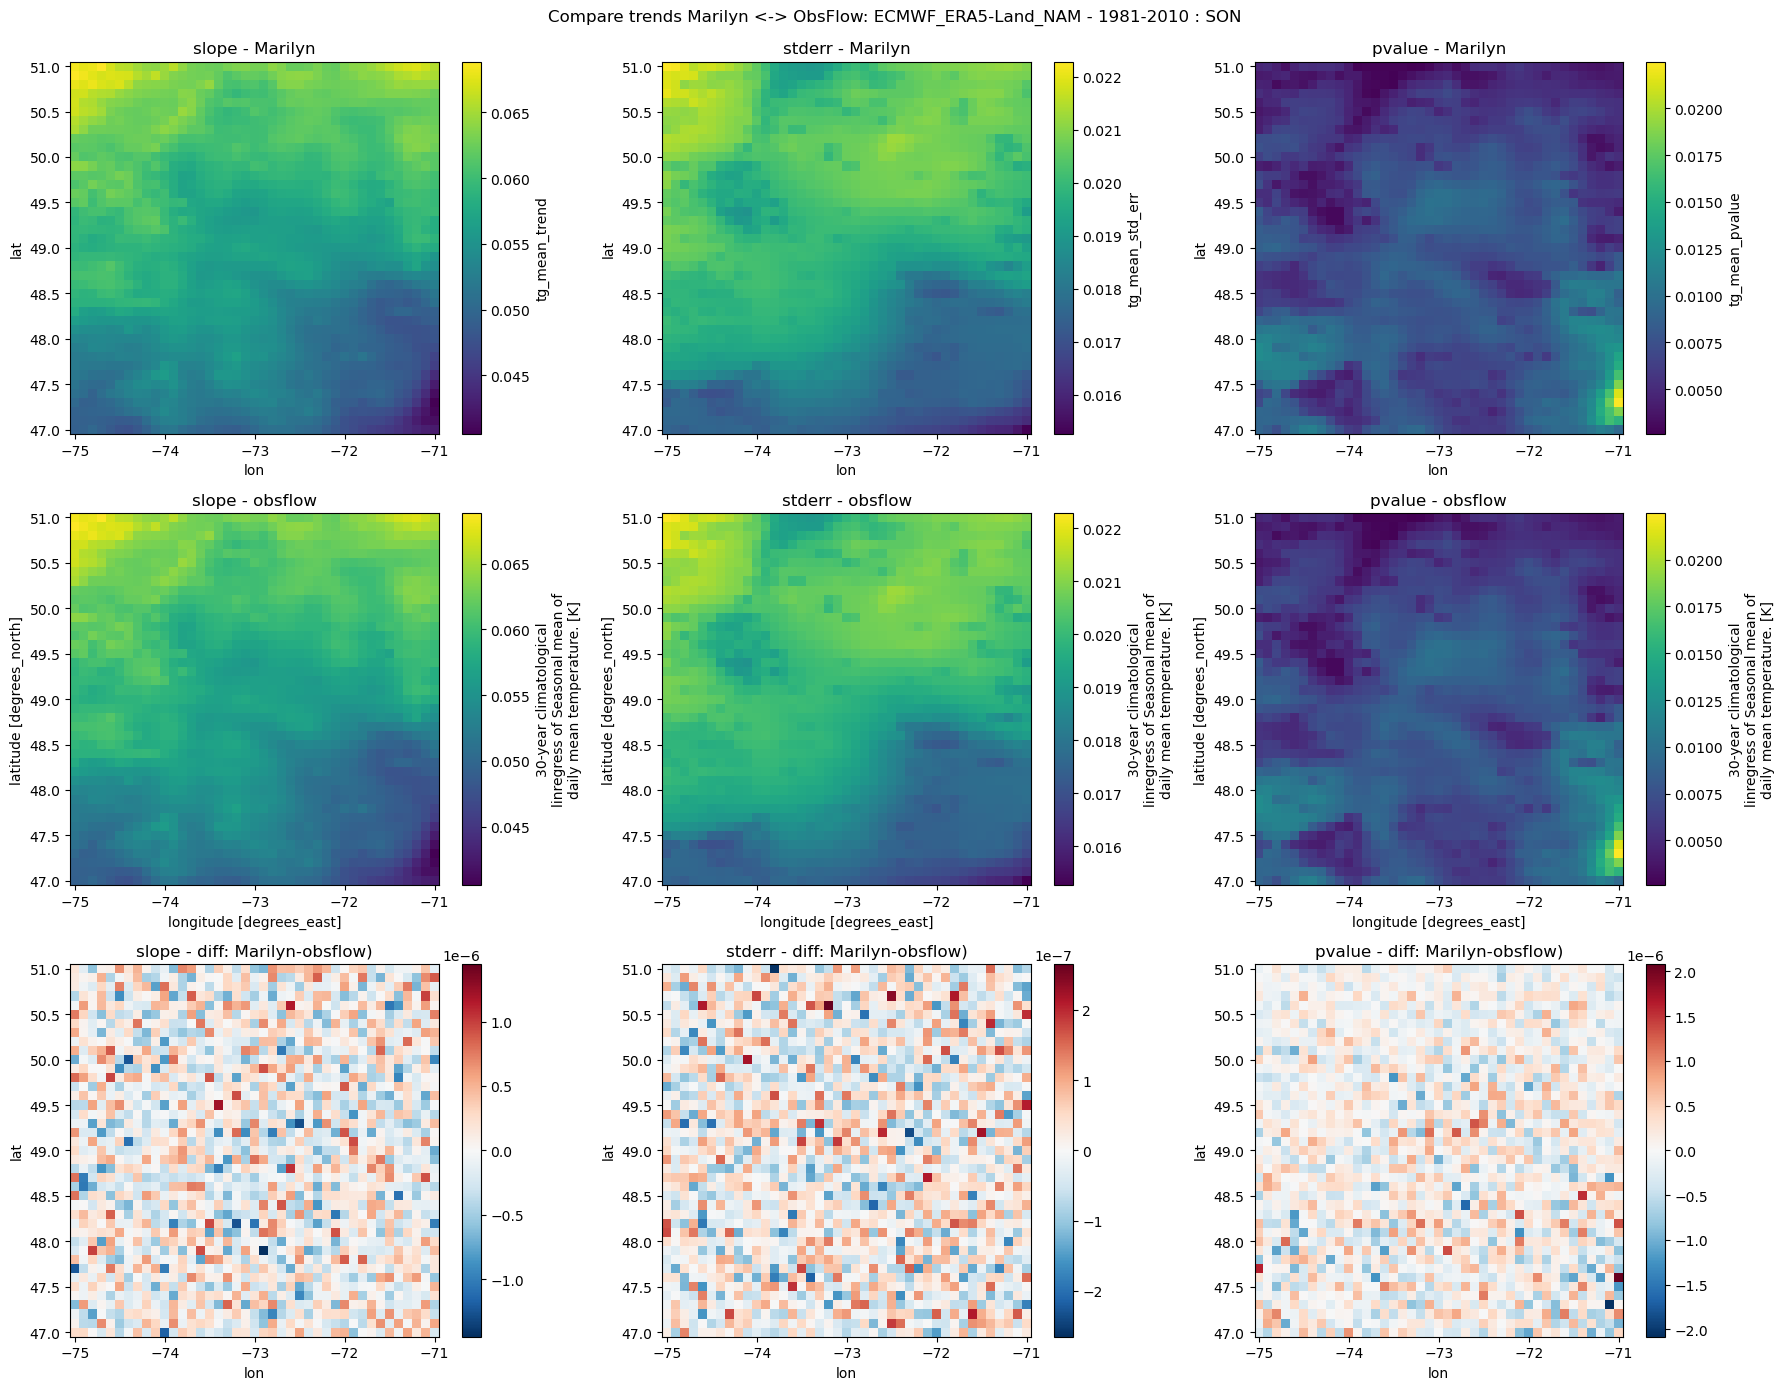

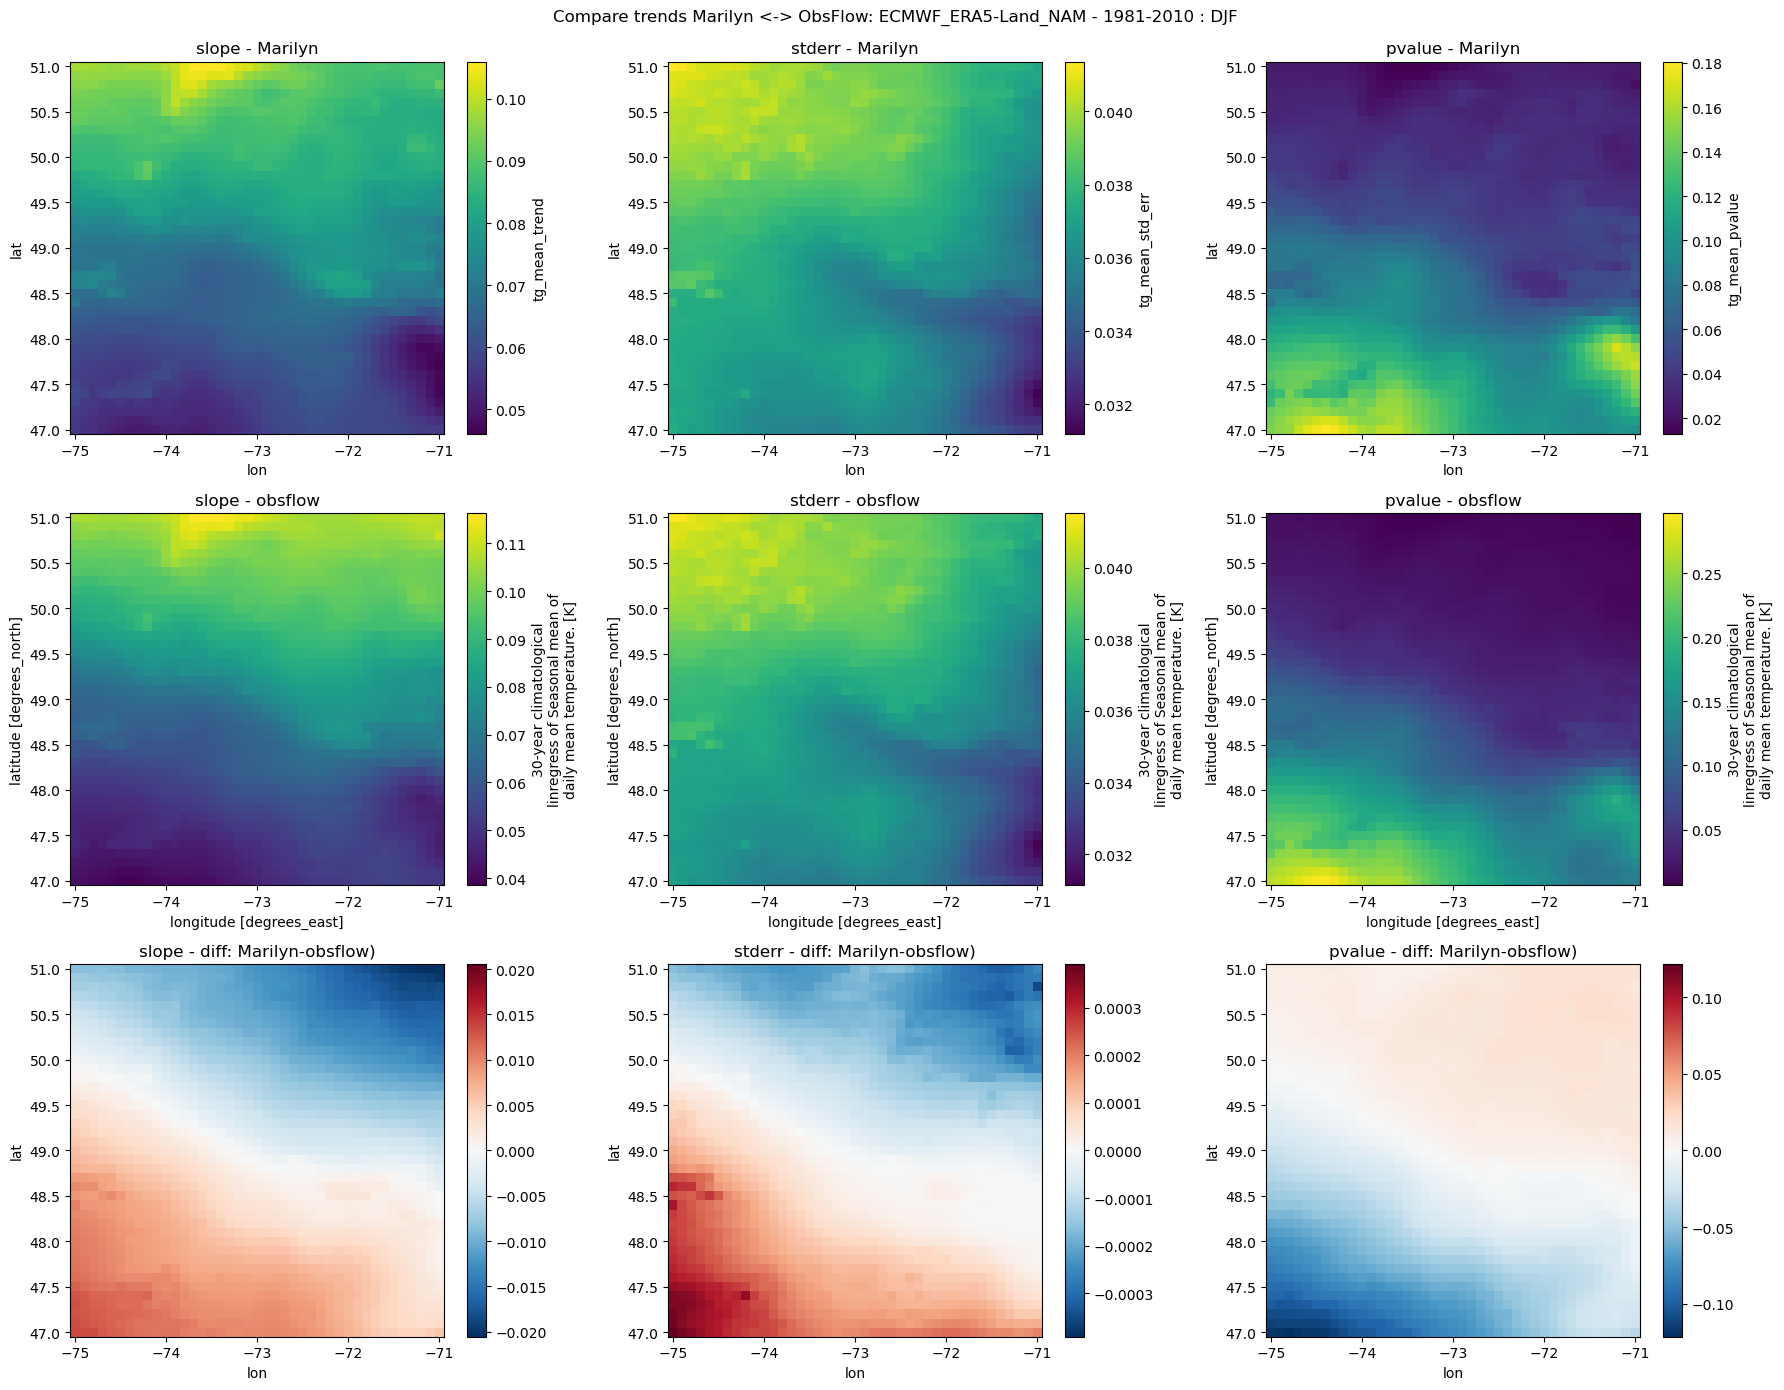

'ECMWF_ERA5-Land_NAM season Marilyn'

<xarray.Dataset>
Dimensions:          (lat: 41, lon: 41, season: 4)
Coordinates:
  * lat              (lat) float32 47.0 47.1 47.2 47.3 ... 50.7 50.8 50.9 51.0
  * lon              (lon) float32 -75.0 -74.9 -74.8 -74.7 ... -71.2 -71.1 -71.0
  * season           (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    tg_mean_pvalue   (season, lat, lon) float64 ...
    tg_mean_std_err  (season, lat, lon) float64 ...
    tg_mean_trend    (season, lat, lon) float64 ...
    tn_mean_pvalue   (season, lat, lon) float64 ...
    tn_mean_std_err  (season, lat, lon) float64 ...
    tn_mean_trend    (season, lat, lon) float64 ...
    tx_mean_pvalue   (season, lat, lon) float64 ...
    tx_mean_std_err  (season, lat, lon) float64 ...
    tx_mean_trend    (season, lat, lon) float64 ...
Attributes:
    description:  Linear least-squares regression for seasonal values
    end_date:     2020-11-30
    start_date:   1990-11-30
    units:        (unit of variables)/year

'ECMWF_ERA5-Land_NAM season obsflow'

<xarray.Dataset>
Dimensions:                  (lat: 41, linreg_param: 6, lon: 41, period: 6,
                              season: 4)
Coordinates:
  * lat                      (lat) float32 47.0 47.1 47.2 ... 50.8 50.9 51.0
  * linreg_param             (linreg_param) <U16 'slope' ... 'intercept_stderr'
  * lon                      (lon) float32 -75.0 -74.9 -74.8 ... -71.1 -71.0
  * period                   (period) object '1951-1980' ... '1991-2020'
  * season                   (season) <U3 'MAM' 'JJA' 'SON' 'DJF'
    time                     (period, season) datetime64[ns] dask.array<chunksize=(6, 4), meta=np.ndarray>
Data variables: (12/15)
    tg_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    tg_mean_clim_mean        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_mean_clim_std         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_std_clim_mean         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tn_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    ...                       ...
    tn_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    tx_mean_clim_mean        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_mean_clim_std         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_std_clim_mean         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-01 00:00:00
    cat:date_start:          1950-03-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           qtr
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

Display the datasets and their difference


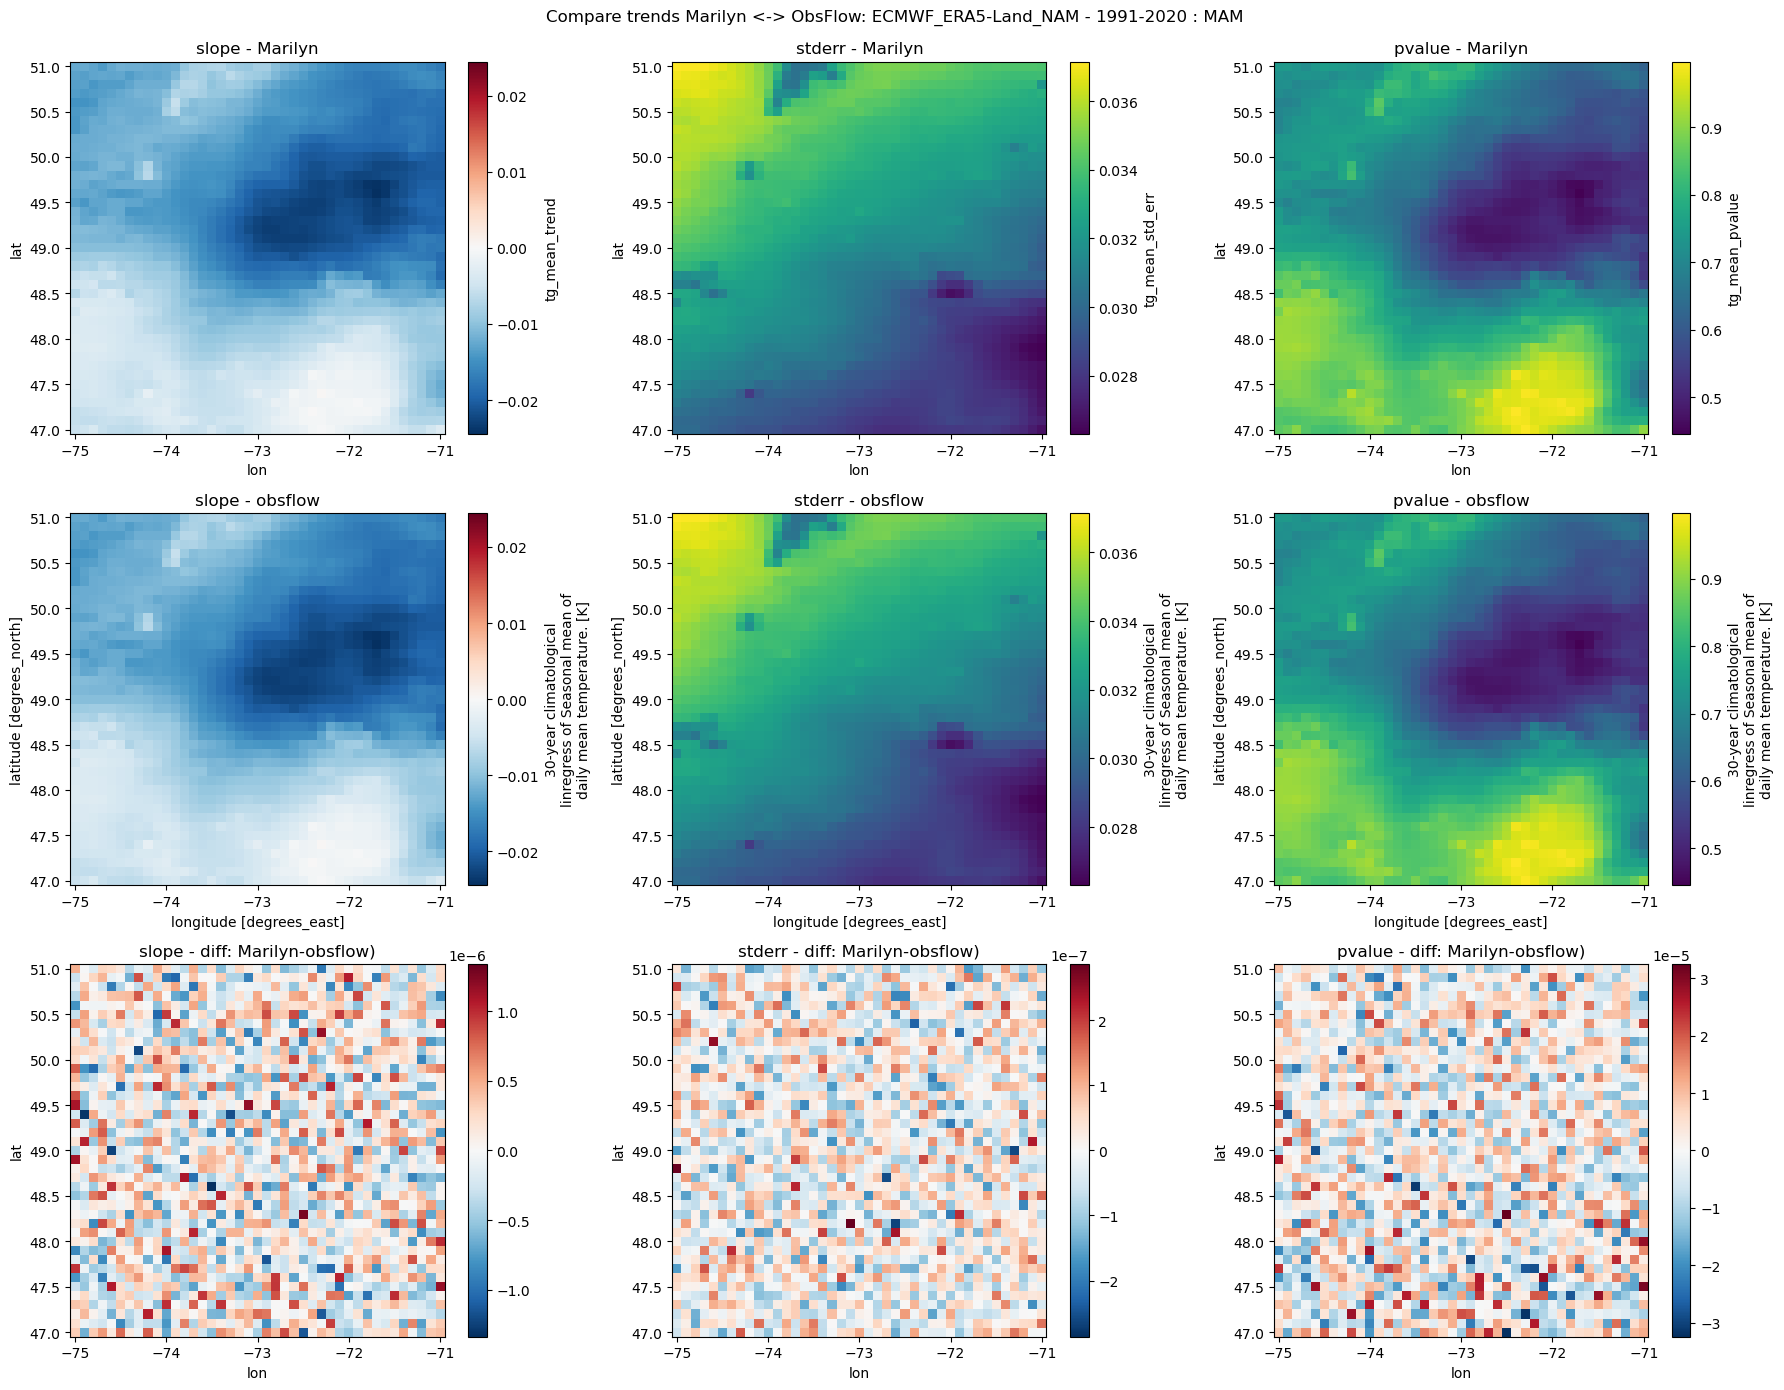

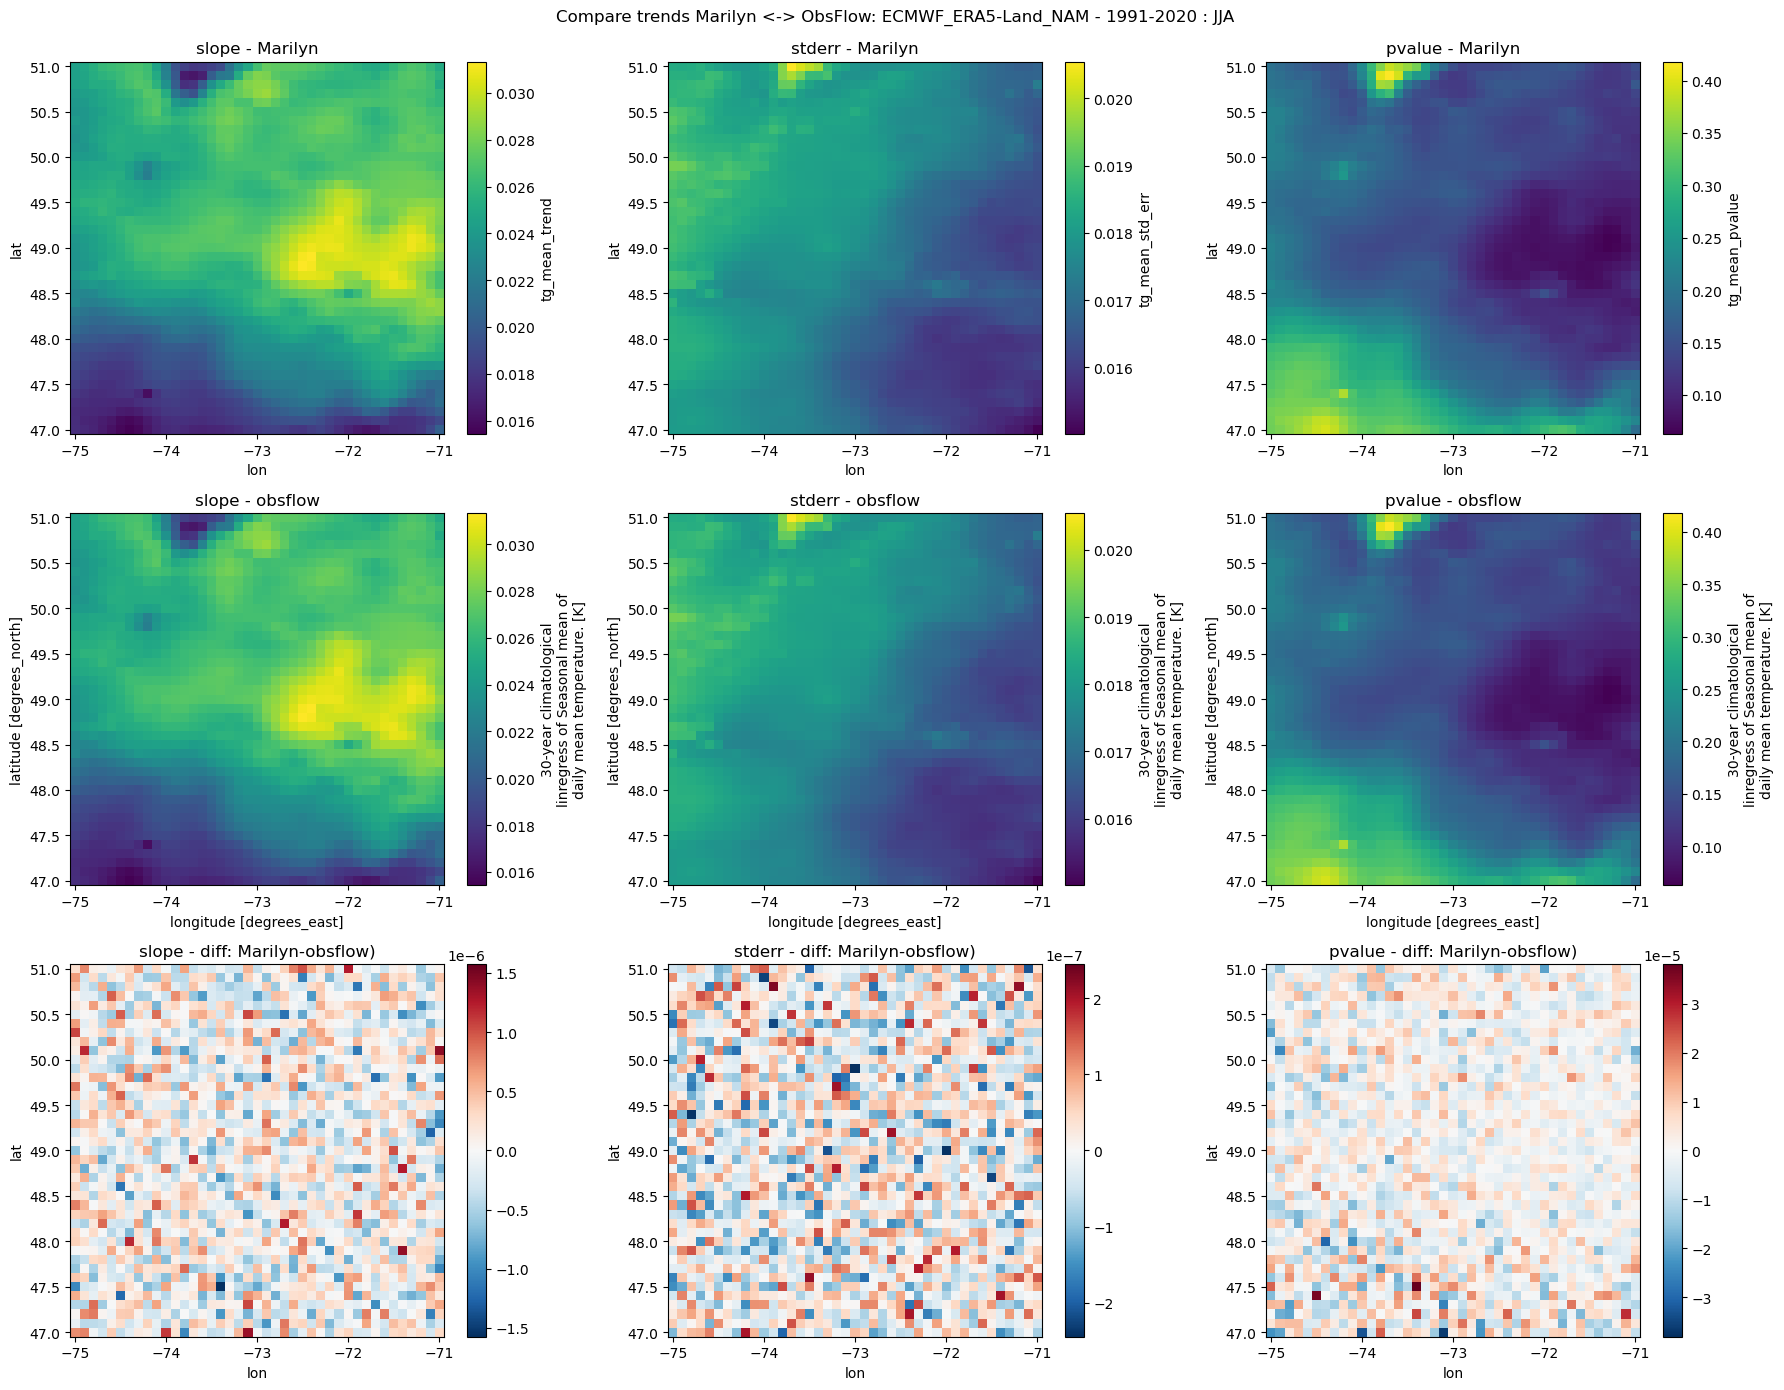

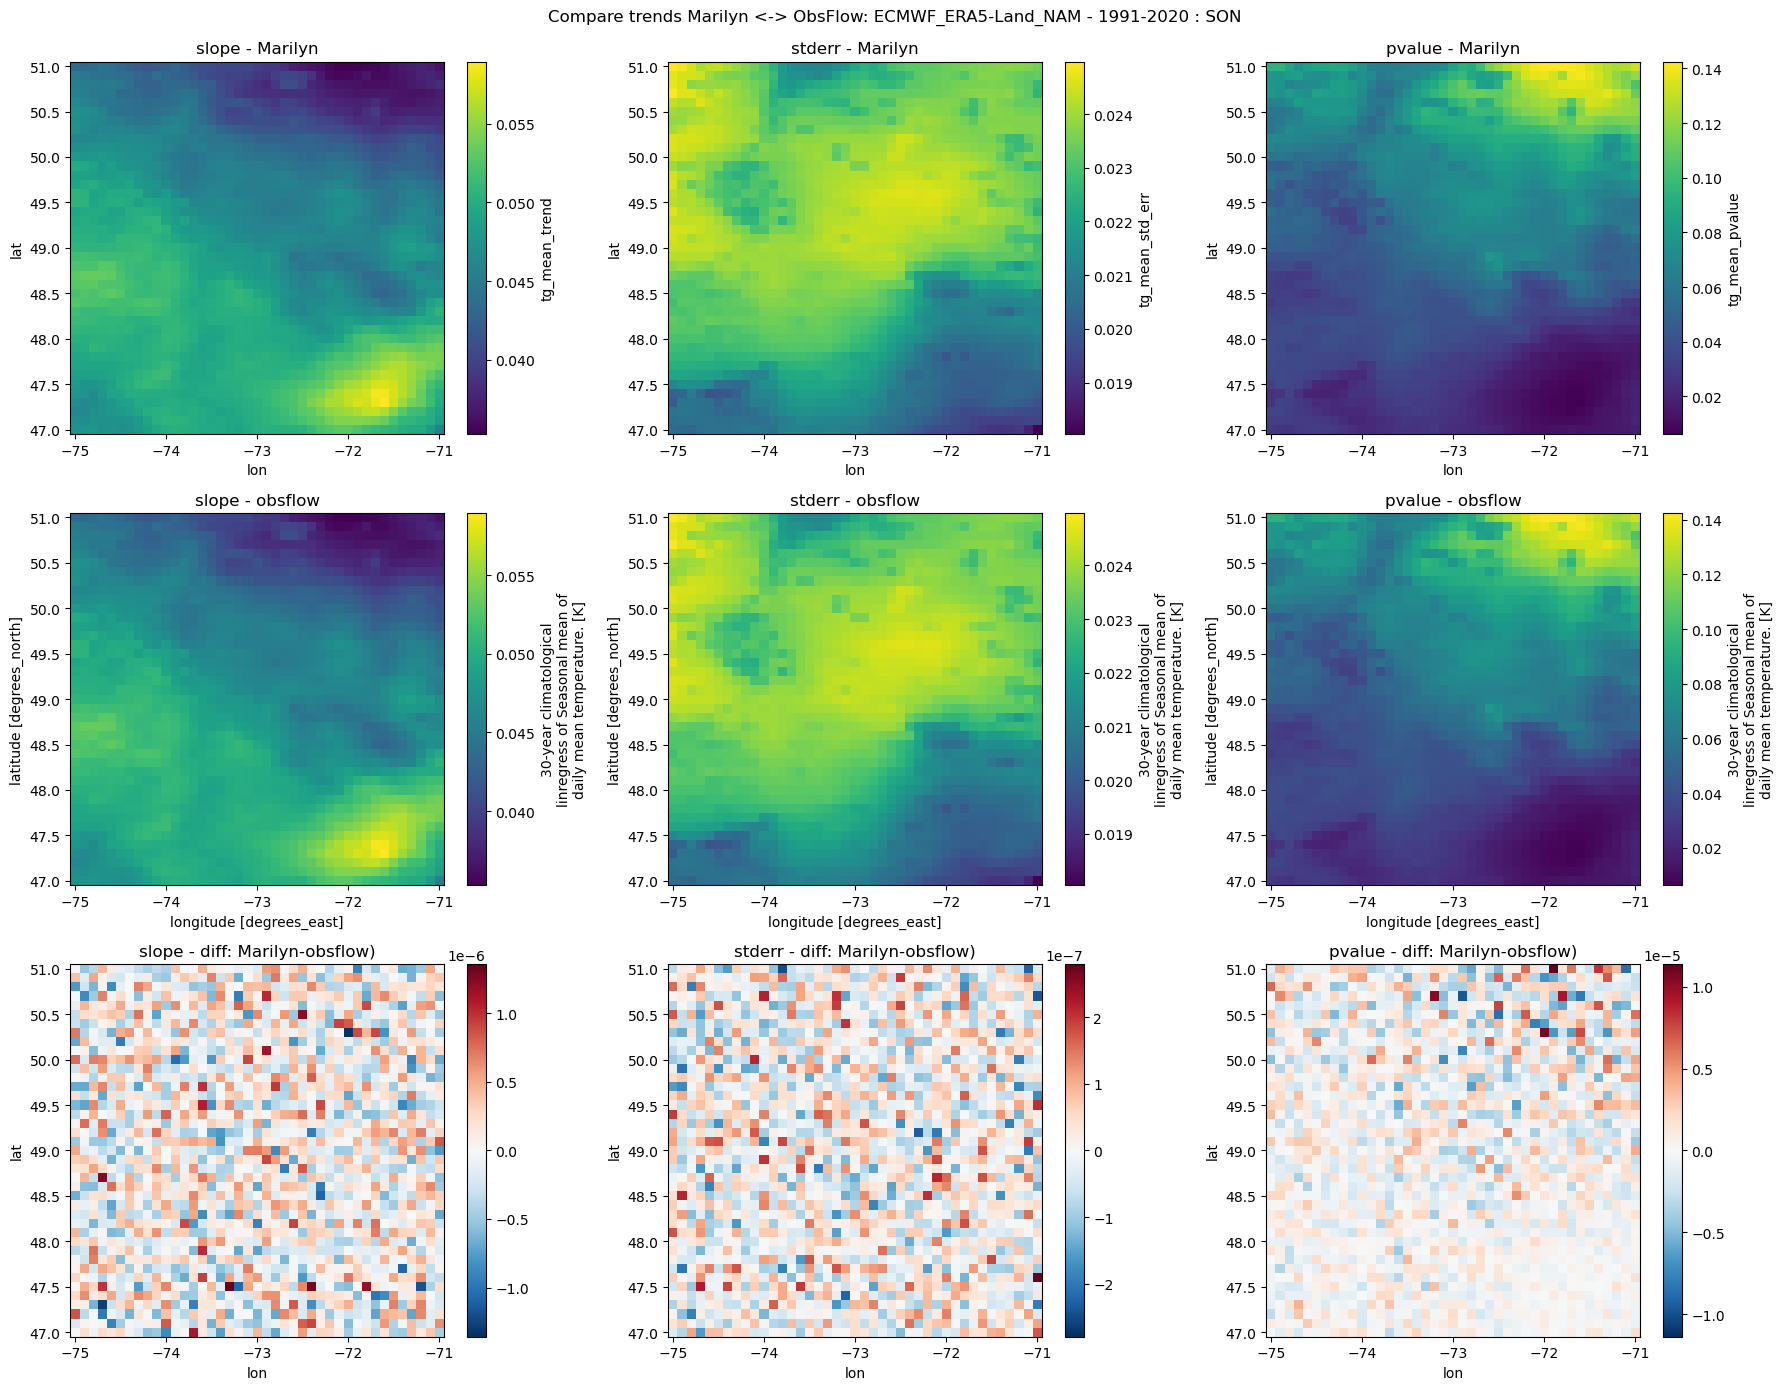

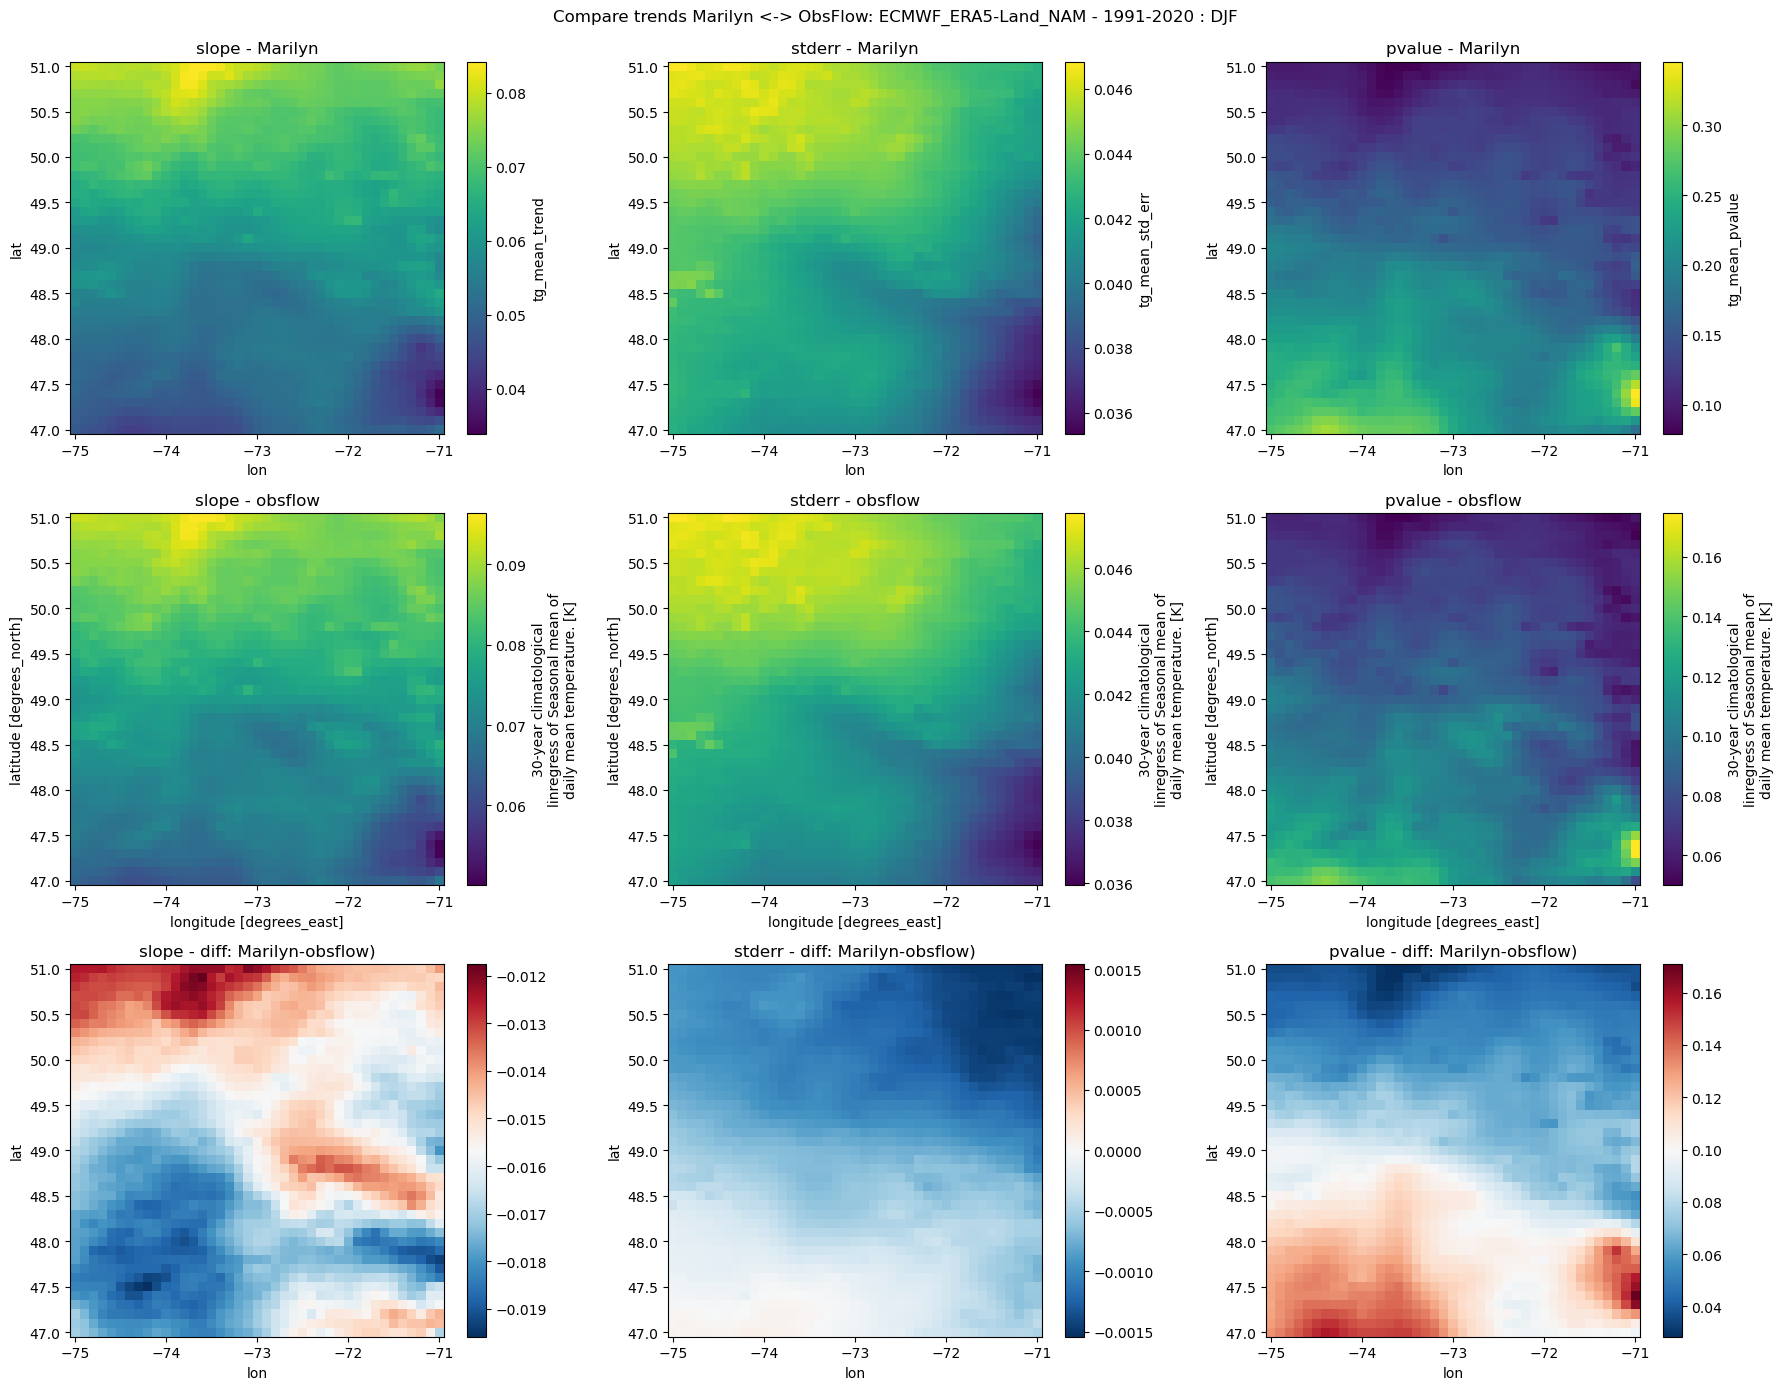

In [6]:
import xarray as xr
from pathlib import Path
from clisops.core.subset import subset_bbox
import matplotlib.pyplot as plt
import xscen as xs
import random


mf_dir = Path('/scen3/braun/data/obs_synthese23/data_marilyn/data/')
# things to iterate over
data_mf = {'month' : ['AHCCD/months/stats_trend/AHCCD_gen3_stats_trend_{period}.zarr', 'ERA5-LAND/months/stats_trend/ECMWF_ERA5-Land_monthly_trend_{period}.zarr',
                        'RDRS/months/stats_trend/GouvCan_RDRS_monthly_trend_{period}.zarr'], 
           'season': ['AHCCD/seasons/stats_trend/AHCCD_gen3_stats_trend_{period}.zarr', 'ERA5-LAND/seasons/stats_trend/ECMWF_ERA5-Land_seasonal_trend_{period}.zarr',
                        'RDRS/seasons/stats_trend/GouvCan_RDRS_seasonal_trend_{period}.zarr'],
           'year': ['AHCCD/annual/stats_trend/AHCCD_gen3_stats_trend_admin_reg_{period}.nc', 'ERA5-LAND/annual/stats_trend/ECMWF_ERA5_annual_trend_{period}.zarr',
                      'RDRS/annual/stats_trend/GouvCan_RDRS_annual_trend_{period}.zarr']}
data_of = {'month': ['GovCan_AHCCD_NAM.Quebec.climatology.MS', 'ECMWF_ERA5-Land_NAM.Quebec.climatology.MS', 'GovCan_RDRS_NAM.Quebec.climatology.MS'],
           'season': ['GovCan_AHCCD_NAM.Quebec.climatology.QS-DEC', 'ECMWF_ERA5-Land_NAM.Quebec.climatology.QS-DEC', 'GovCan_RDRS_NAM.Quebec.climatology.QS-DEC'],
           'year': ['GovCan_AHCCD_NAM.Quebec.climatology.AS-JAN', 'ECMWF_ERA5-Land_NAM.Quebec.climatology.AS-JAN', 'GovCan_RDRS_NAM.Quebec.climatology.AS-JAN']}
tmp_agg = {'monthly': 'MS', 'seasonal': 'QS-DEC', 'annual': 'AS-JAN'}
params ={'slope': 'trend', 'stderr': 'std_err', 'pvalue': 'pvalue'}
periods = ['1951-1980', '1961-1990', '1971-2000', '1981-2010', '1991-2020']
# periods = ['1981-2010', '1991-2018']
periods_djf = {'1951-1980': '1950-1979', '1961-1990': '1960-1989', '1971-2000': '1970-1999', '1981-2010': '1980-2009', '1991-2020': '1990-2019', '1991-2018': '1990-2017'}
periods_djf = {'1951-1980': '1951-1980', '1961-1990': '1961-1990', '1971-2000': '1971-2000', '1981-2010': '1981-2010', '1991-2020': '1991-2020', '1991-2018': '1991-2018'}
#tmp_res = 'seasonal'

pcat = xs.ProjectCatalog('/scen3/braun/data/obs_synthese23/pcat_obs.json')
# display(pcat.df)
ds_dict = pcat.search(processing_level='climatology').to_dataset_dict()
# for name, ds in sorted(ds_dict.items()): print(name)    

for period in periods:
    for tmp_res in ['season']: # ['year']:  # ['month', 'season']:  #['monthly', 'seasonal']:
    #     # iterate over both datasets
        for mf, of in zip(data_mf[tmp_res], data_of[tmp_res]):
            if any(s for s in ['AHCCD', 'RDRS'] if s in mf): continue
            
            # Deal with inconsistency in Marilyn's data
            if tmp_res == 'year' and period == '1991-2020':
                mf = mf.replace('ERA5_', 'ERA5-Land_')
            mf_period = period.replace('-', '_')
            if tmp_res == 'season':
                mf_period = mf_period[:3] + '0' + mf_period[4:]
            # print(mf_period)
            
            # get the data
            ds_mf = xr.open_dataset(mf_dir / mf.format(period=mf_period), engine='zarr')
            #display(f'{of.split(".")[0]} {tmp_res} Marilyn', ds_mf)
            ds_of = ds_dict[of]
            #display(f'{of.split(".")[0]} {tmp_res} obsflow', ds_of)
            # lat/lon have been removed in RDRS so we can't subset on them
            if 'RDRS' in mf:
                ds_mf = ds_mf.where((ds_mf.rlat > -5) & (ds_mf.rlat < 0) & (ds_mf.rlon > 370) & (ds_mf.rlon < 375) , drop=True)
                ds_of = ds_of.where((ds_of.rlat > -5) & (ds_of.rlat < 0) & (ds_of.rlon > 370) & (ds_of.rlon < 375) , drop=True)
                x_coord, y_coord = 'rlon', 'rlat'
            else:
                my_bbox = {'lon_bnds': [-75, -71], 'lat_bnds' : [47, 51]}
                ds_mf = subset_bbox(ds_mf, **my_bbox) 
                ds_of = subset_bbox(ds_dict[of], **my_bbox)
                x_coord, y_coord = 'lon', 'lat'
                
            display(f'{of.split(".")[0]} {tmp_res} Marilyn', ds_mf)
            display(f'{of.split(".")[0]} {tmp_res} obsflow', ds_of)
            
            # change period when seasons were taken from one year earlier for DJF
            period = [periods_djf[period] if tmp_res == 'season' else period][0]
            
            print('Display the datasets and their difference')
            for t, tmp in enumerate(ds_of[tmp_res].values, start=1):
                if tmp_res != 'season':
                    rows, cols = (1, 3)  
                    figsize_y = 4
                    title_pos = 0.99 #1.02
                else:
                    rows, cols = (3, 3)
                    figsize_y = 14
                    title_pos = 0.99
                fig, ax = plt.subplots(rows, cols, figsize=(18, figsize_y))
                if tmp_res != 'season': ax = ax.reshape(1,3)
                for p, param in enumerate(params.keys()):
                    # fix inconsistency issues in Marilyn's data
                    if tmp_res == 'month':
                        my_sel = {tmp_res: t}
                    if tmp_res == 'season':
                        my_sel = {tmp_res: tmp}
                    if tmp_res == 'year':
                        my_sel = {}
                    if tmp_res == 'season':
                        ds_mf[f'tg_mean_{params[param]}'].sel(my_sel).plot(ax=ax[rows-3,p], x=x_coord, y=y_coord)
                        ax[rows-3, p].set_title(f'{param} - Marilyn')
                        ds_of.tg_mean_clim_linregress.sel({'period' : period, tmp_res: tmp, 'linreg_param':param}).plot(ax=ax[rows-2,p], x=x_coord, y=y_coord)
                        ax[rows-2, p].set_title(f'{param} - obsflow')
                    diff = (ds_mf[f'tg_mean_{params[param]}'].sel(my_sel) - 
                            ds_of.tg_mean_clim_linregress.sel({'period' : period, tmp_res: tmp, 'linreg_param':param}))
                    diff.plot(ax=ax[rows-1,p], x=x_coord, y=y_coord, cmap='RdBu_r')
                    ax[rows-1, p].set_title(f'{param} - diff: Marilyn-obsflow)')
                fig.suptitle(f'Compare trends Marilyn <-> ObsFlow: {of.split(".")[0]} - {period} : {tmp}', y=title_pos, wrap=True);
                fig.tight_layout()
                plt.show()

In [4]:
ds_of

<xarray.Dataset>
Dimensions:                  (lat: 41, linreg_param: 6, lon: 41, period: 6,
                              season: 4)
Coordinates:
  * lat                      (lat) float32 47.0 47.1 47.2 ... 50.8 50.9 51.0
  * linreg_param             (linreg_param) <U16 'slope' ... 'intercept_stderr'
  * lon                      (lon) float32 -75.0 -74.9 -74.8 ... -71.1 -71.0
  * period                   (period) object '1951-1980' ... '1991-2020'
  * season                   (season) <U3 'MAM' 'JJA' 'SON' 'DJF'
    time                     (period, season) datetime64[ns] dask.array<chunksize=(6, 4), meta=np.ndarray>
Data variables: (12/15)
    tg_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    tg_mean_clim_mean        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_mean_clim_std         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_std_clim_mean         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tg_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tn_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    ...                       ...
    tn_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_mean_clim_linregress  (lat, lon, linreg_param, period, season) float32 dask.array<chunksize=(9, 11, 6, 6, 4), meta=np.ndarray>
    tx_mean_clim_mean        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_mean_clim_std         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_std_clim_mean         (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
    tx_std_clim_total        (lat, lon, period, season) float32 dask.array<chunksize=(9, 11, 6, 4), meta=np.ndarray>
Attributes: (12/31)
    Conventions:             CF-1.9
    cat:_data_format_:       zarr
    cat:date_end:            2022-09-01 00:00:00
    cat:date_start:          1950-03-01 00:00:00
    cat:domain:              Quebec
    cat:frequency:           qtr
    ...                      ...
    processing_level:        raw
    project:                 era5-land
    realm:                   atmos
    source:                  ERA5-Land
    table_id:                ECMWF
    type:                    reconstruction

In [5]:
period

'1950-1979'

In [1]:
ds_of

NameError: name 'ds_of' is not defined